<a href="https://colab.research.google.com/github/heidiywseo/customer-segmentation-credit-card/blob/main/customer_segmentation_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will use K-means clustering to perform customer segmentation on credit card customers data.

Customer segmentation groups customers based on shared characteristics and behaviors, allowing businesses to customize marketing strategies and services to maximize customer value.

The dataset is available on Kaggle [here](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).

This project was completed in reference to these sources:

*   https://www.kaggle.com/code/prashant111/k-means-clustering-with-python
*   https://baotramduong.medium.com/data-science-project-customer-market-segmentation-with-k-means-and-pca-techniques-in-unsupervised-7aae88d52159
*   https://realpython.com/k-means-clustering-python/



In [5]:
!pip install kneed

In [6]:
import pandas as pd # pandas for data analysis and manpulation
import numpy as np # numpy for computations
import seaborn as sns # seaborn for data visualization
import matplotlib.pyplot as plt # matplotlib for graphs
from sklearn.preprocessing import StandardScaler, normalize # standardize and scale features
from sklearn.cluster import KMeans # K-means clustering
from sklearn.decomposition import PCA # Principal Component Analysis
from kneed import KneeLocator # KneeLocator to identify the "elbow" in the plot

import missingno # missingno to visualize missing data

import warnings # suppress warnings for cleaner output given deprecation warnings
warnings.filterwarnings('ignore')

In [7]:
# load the data
dataframe = pd.read_csv('CC GENERAL.csv')

# Exploratory Data Analysis

In [8]:
# obtain a summary of the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
# first few rows of the dataset
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
# descriptive statistics of the dataset
dataframe.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<Axes: ylabel='Frequency'>

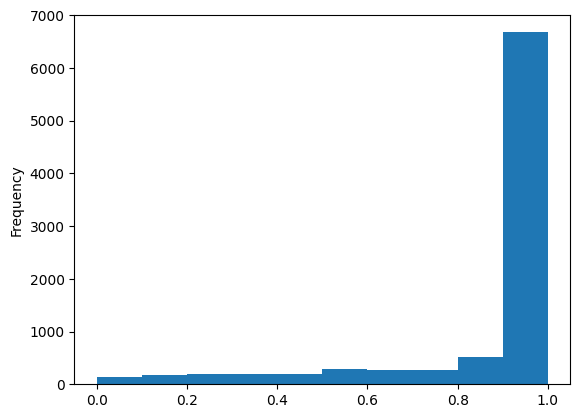

In [11]:
# initial visualization of the balance frequency
dataframe.BALANCE_FREQUENCY.plot.hist()

<Axes: ylabel='Frequency'>

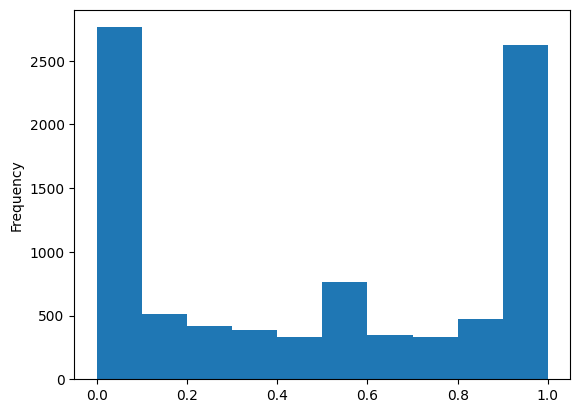

In [12]:
# initial visualization of the purchase frequency
dataframe.PURCHASES_FREQUENCY.plot.hist()

## Visualizing Missing Data

In [13]:
# count the number of missing/null values in each column
dataframe.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


<Axes: >

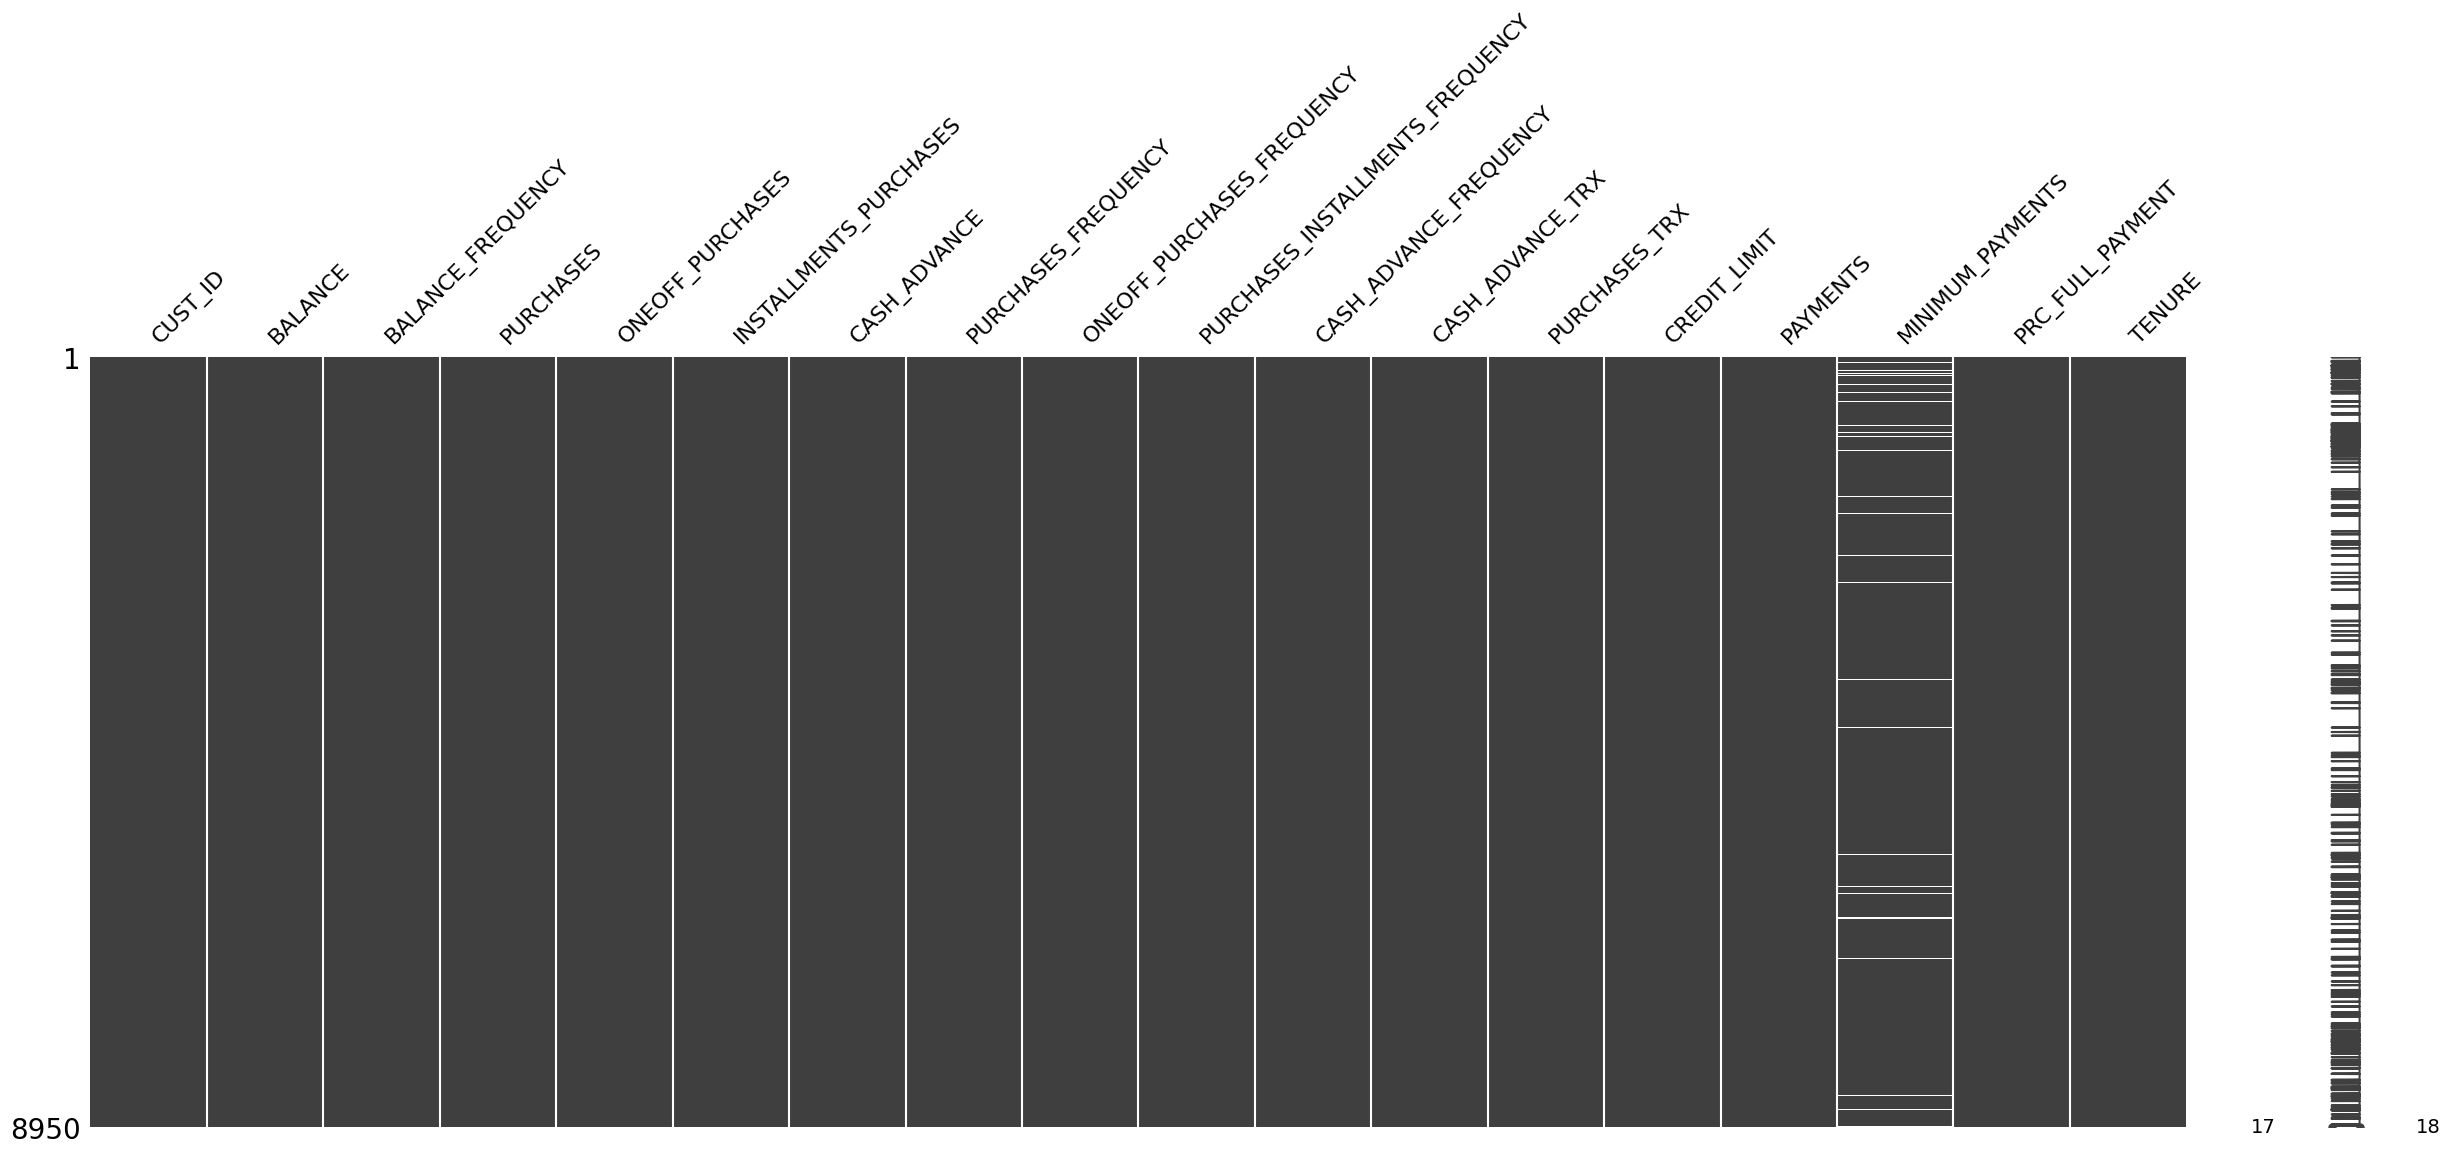

In [14]:
# visualize missing data (1)
missingno.matrix(dataframe, figsize = (30,10))

<Axes: >

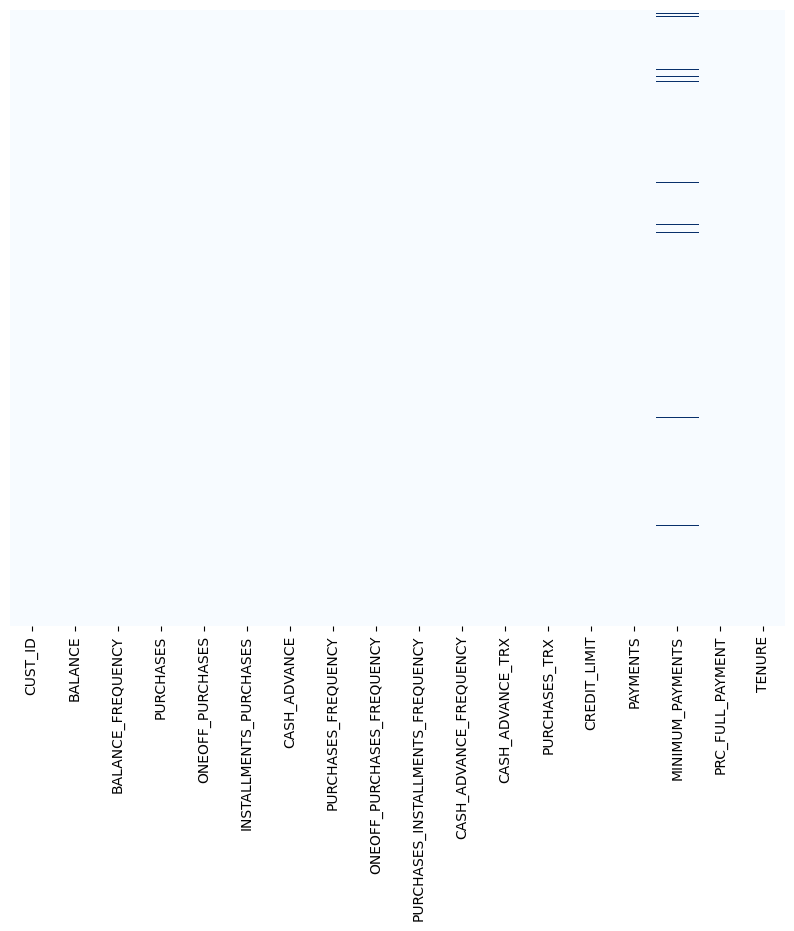

In [15]:
# visualize missing data (2)
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<Axes: >

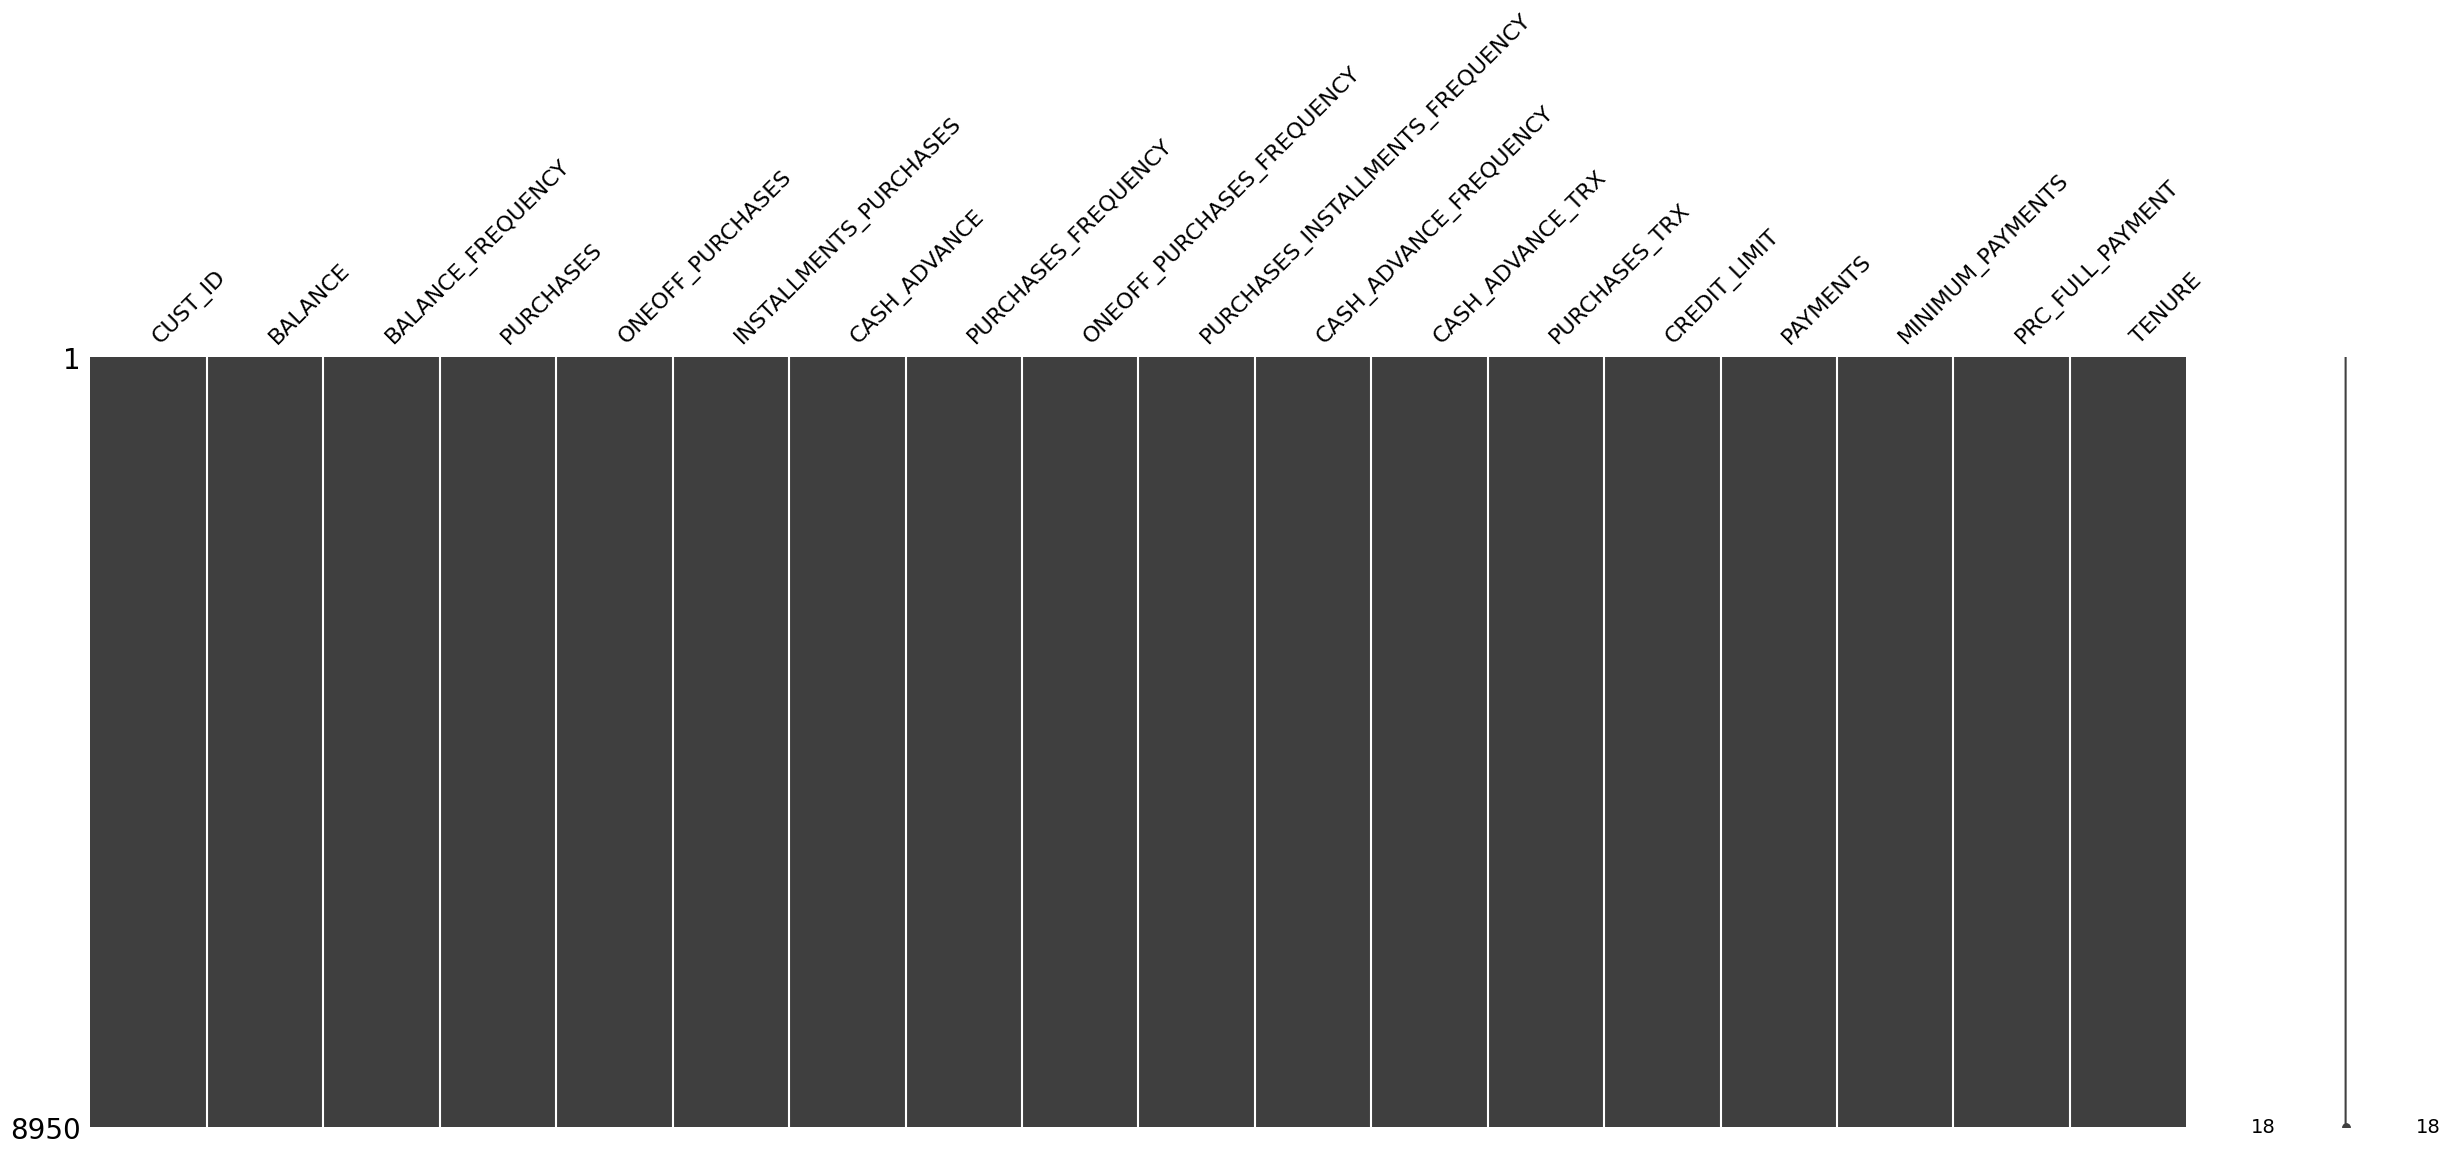

In [16]:
# fill missing elements with the mean of the column
# .loc property to return specified rows
dataframe.loc[(dataframe['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = dataframe['MINIMUM_PAYMENTS'].mean()
dataframe.loc[(dataframe['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = dataframe['CREDIT_LIMIT'].mean()
missingno.matrix(dataframe, figsize = (30,10))

In [17]:
# count duplicate entries/rows
dataframe.duplicated().sum()

0

## Visualize Data Distribution/Density

In [18]:
# columns of the dataset
columns = dataframe.columns
columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

<Figure size 2000x5000 with 0 Axes>

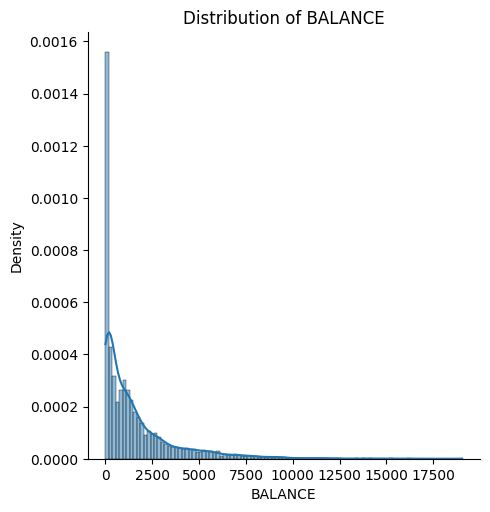

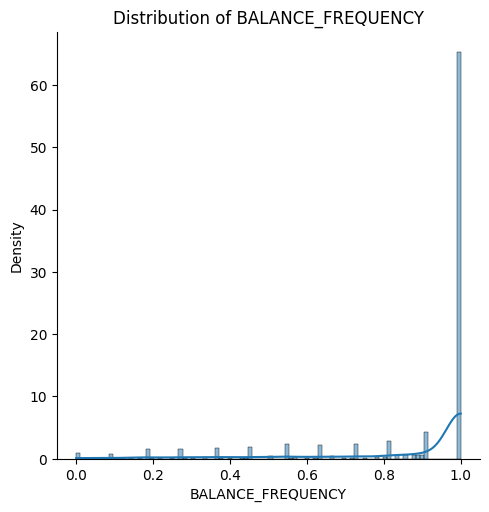

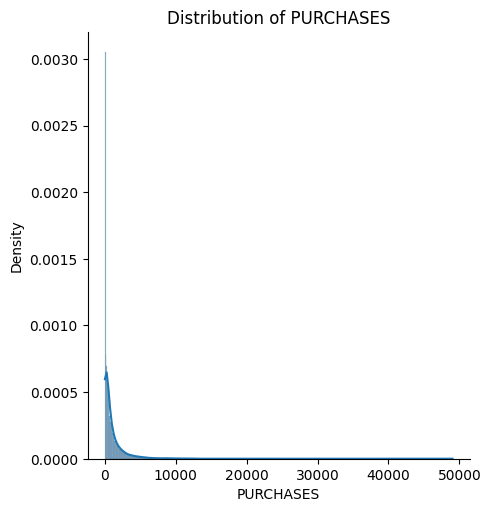

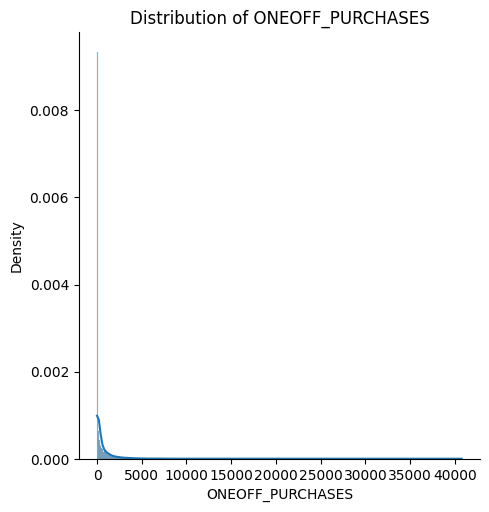

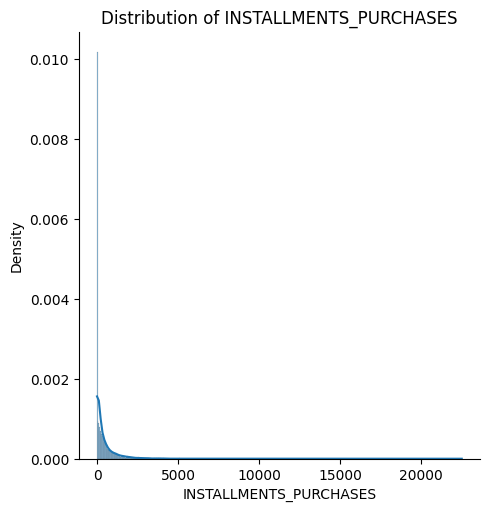

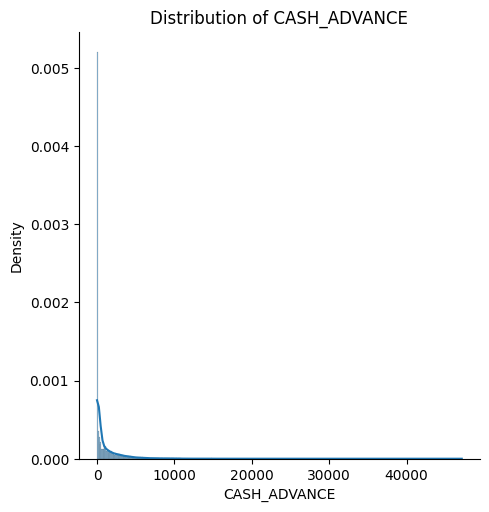

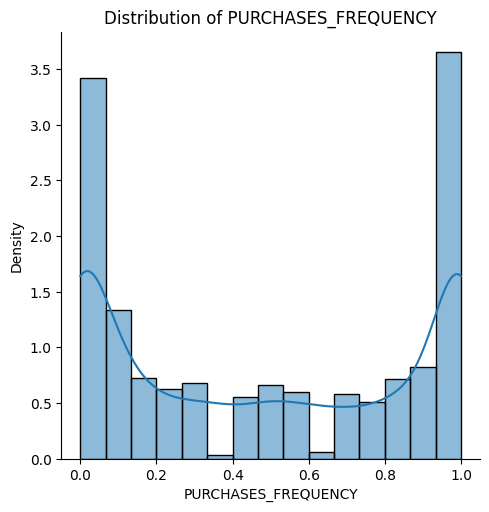

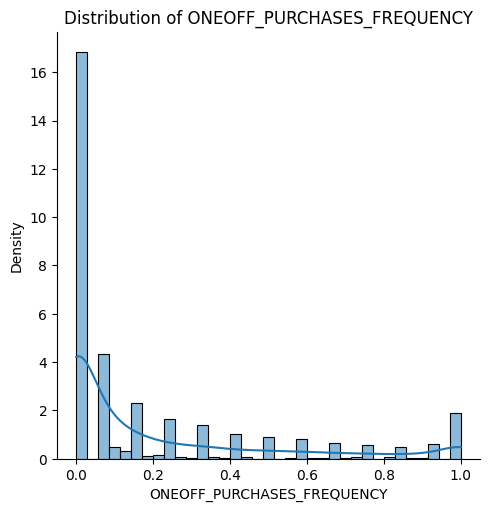

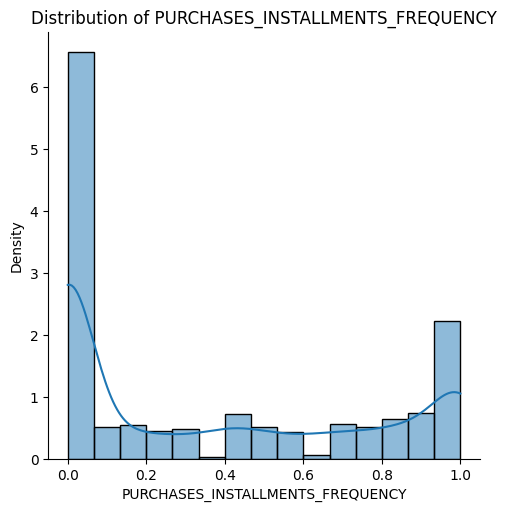

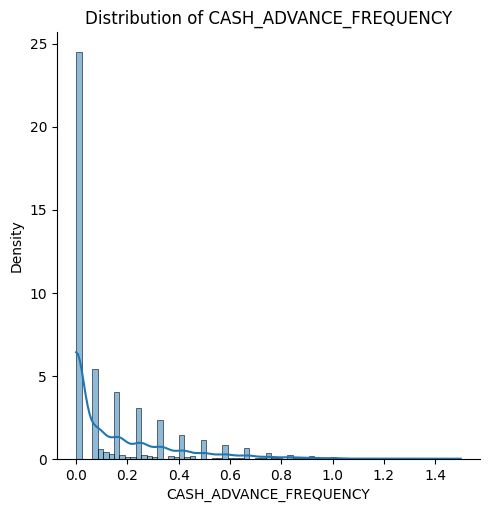

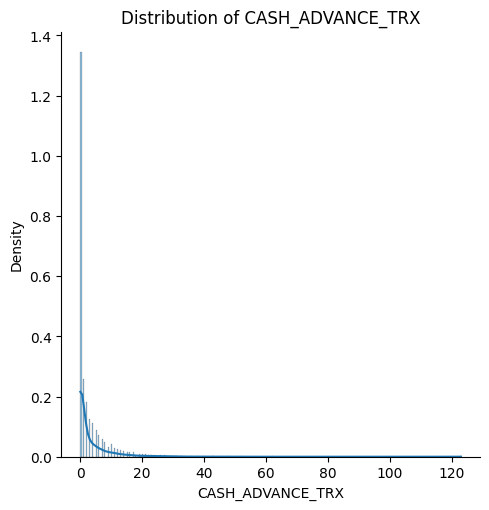

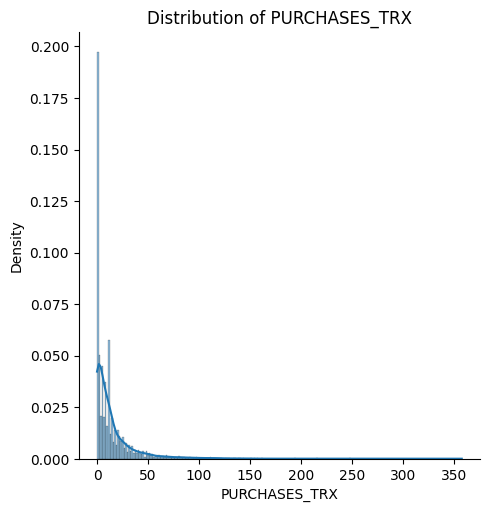

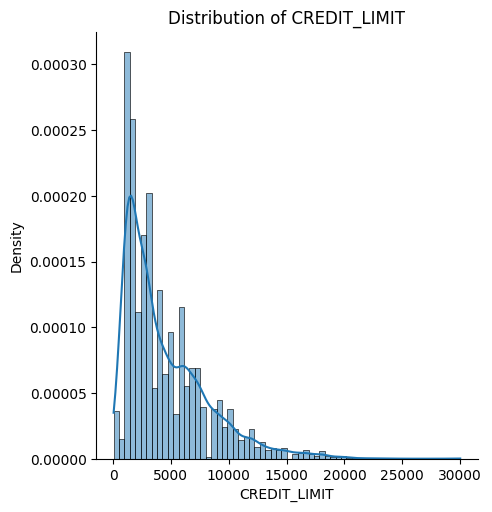

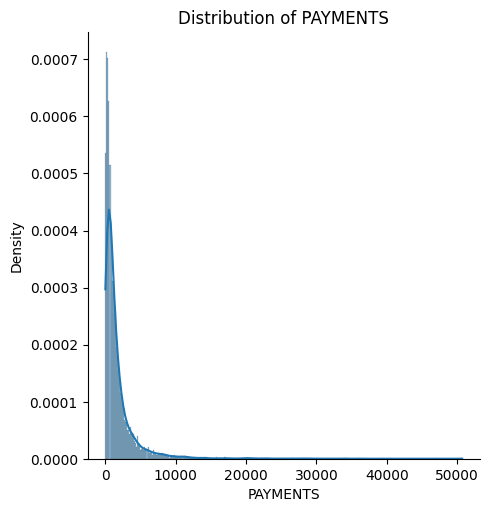

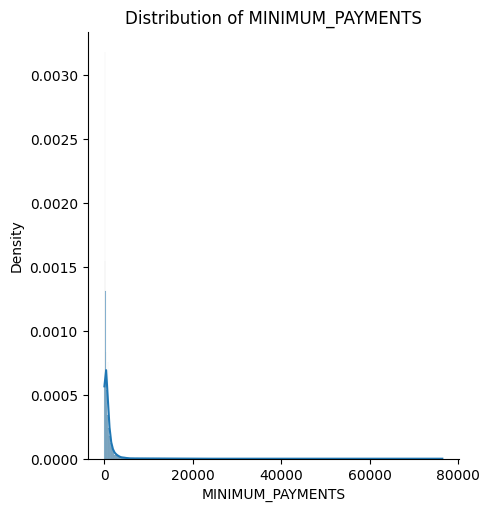

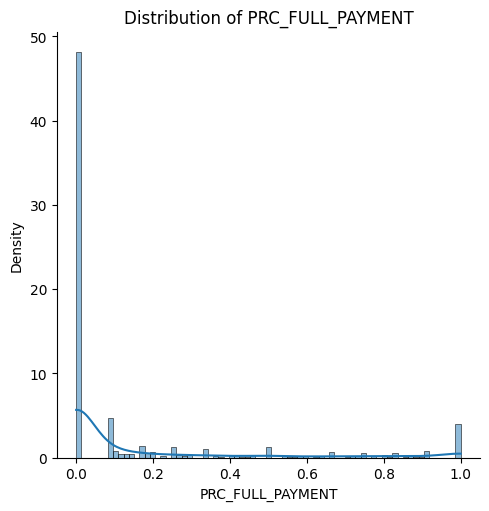

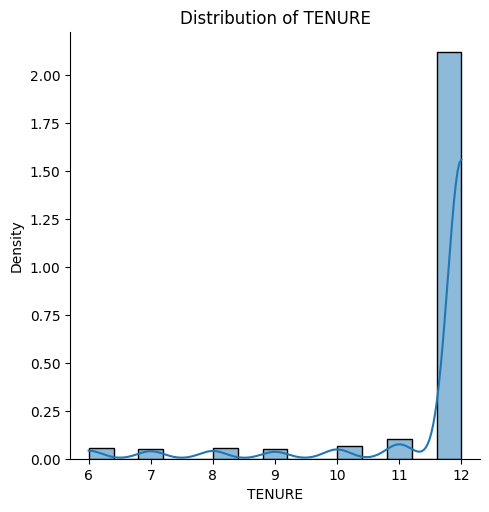

In [19]:
# plot the distribution of each column with numerical values using kernel density estimation (KDE) (1)
plt.figure(figsize=(20, 50))
for column in columns:
    if column != 'CUST_ID':
        sns.displot(dataframe[column], stat='density', kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

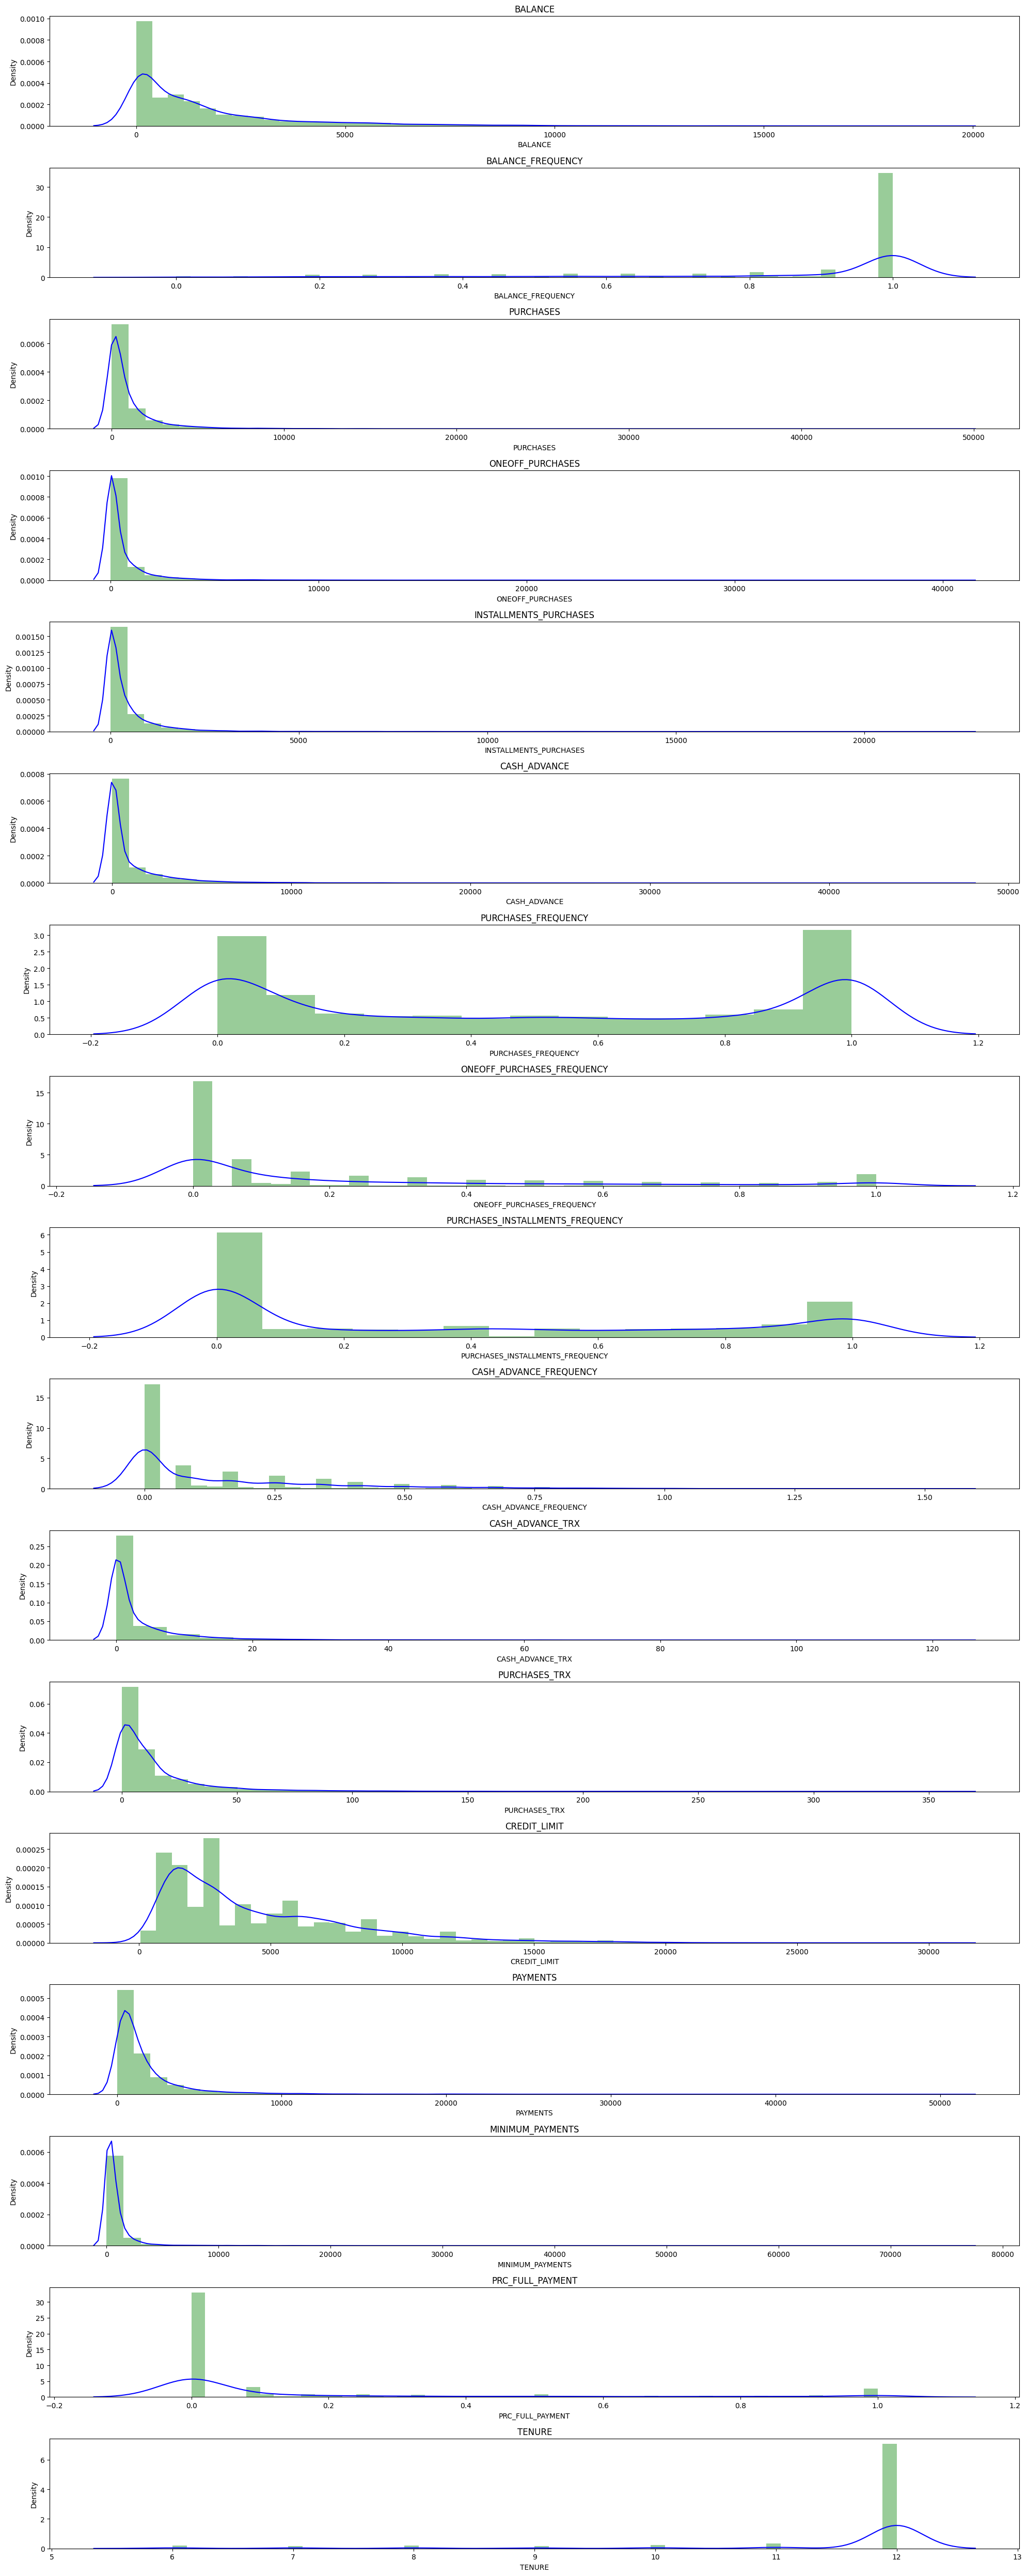

In [20]:
# plot the distribution of each column with numerical values (2)
plt.figure(figsize=(20, 50))
for i in range(1,len(columns)):
  plt.subplot(17, 1, i)
  sns.distplot(dataframe[columns[i]],
               kde_kws={"color": "b", "label": "KDE"},
               hist_kws={"color": "g"})
  plt.title(columns[i])

plt.tight_layout();

In [21]:
# remove CUST_ID since it is not useful when clustering
dataframe.drop("CUST_ID", axis = 1, inplace= True)
dataframe.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
# compute the correlation matrix
corr = dataframe.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<Axes: >

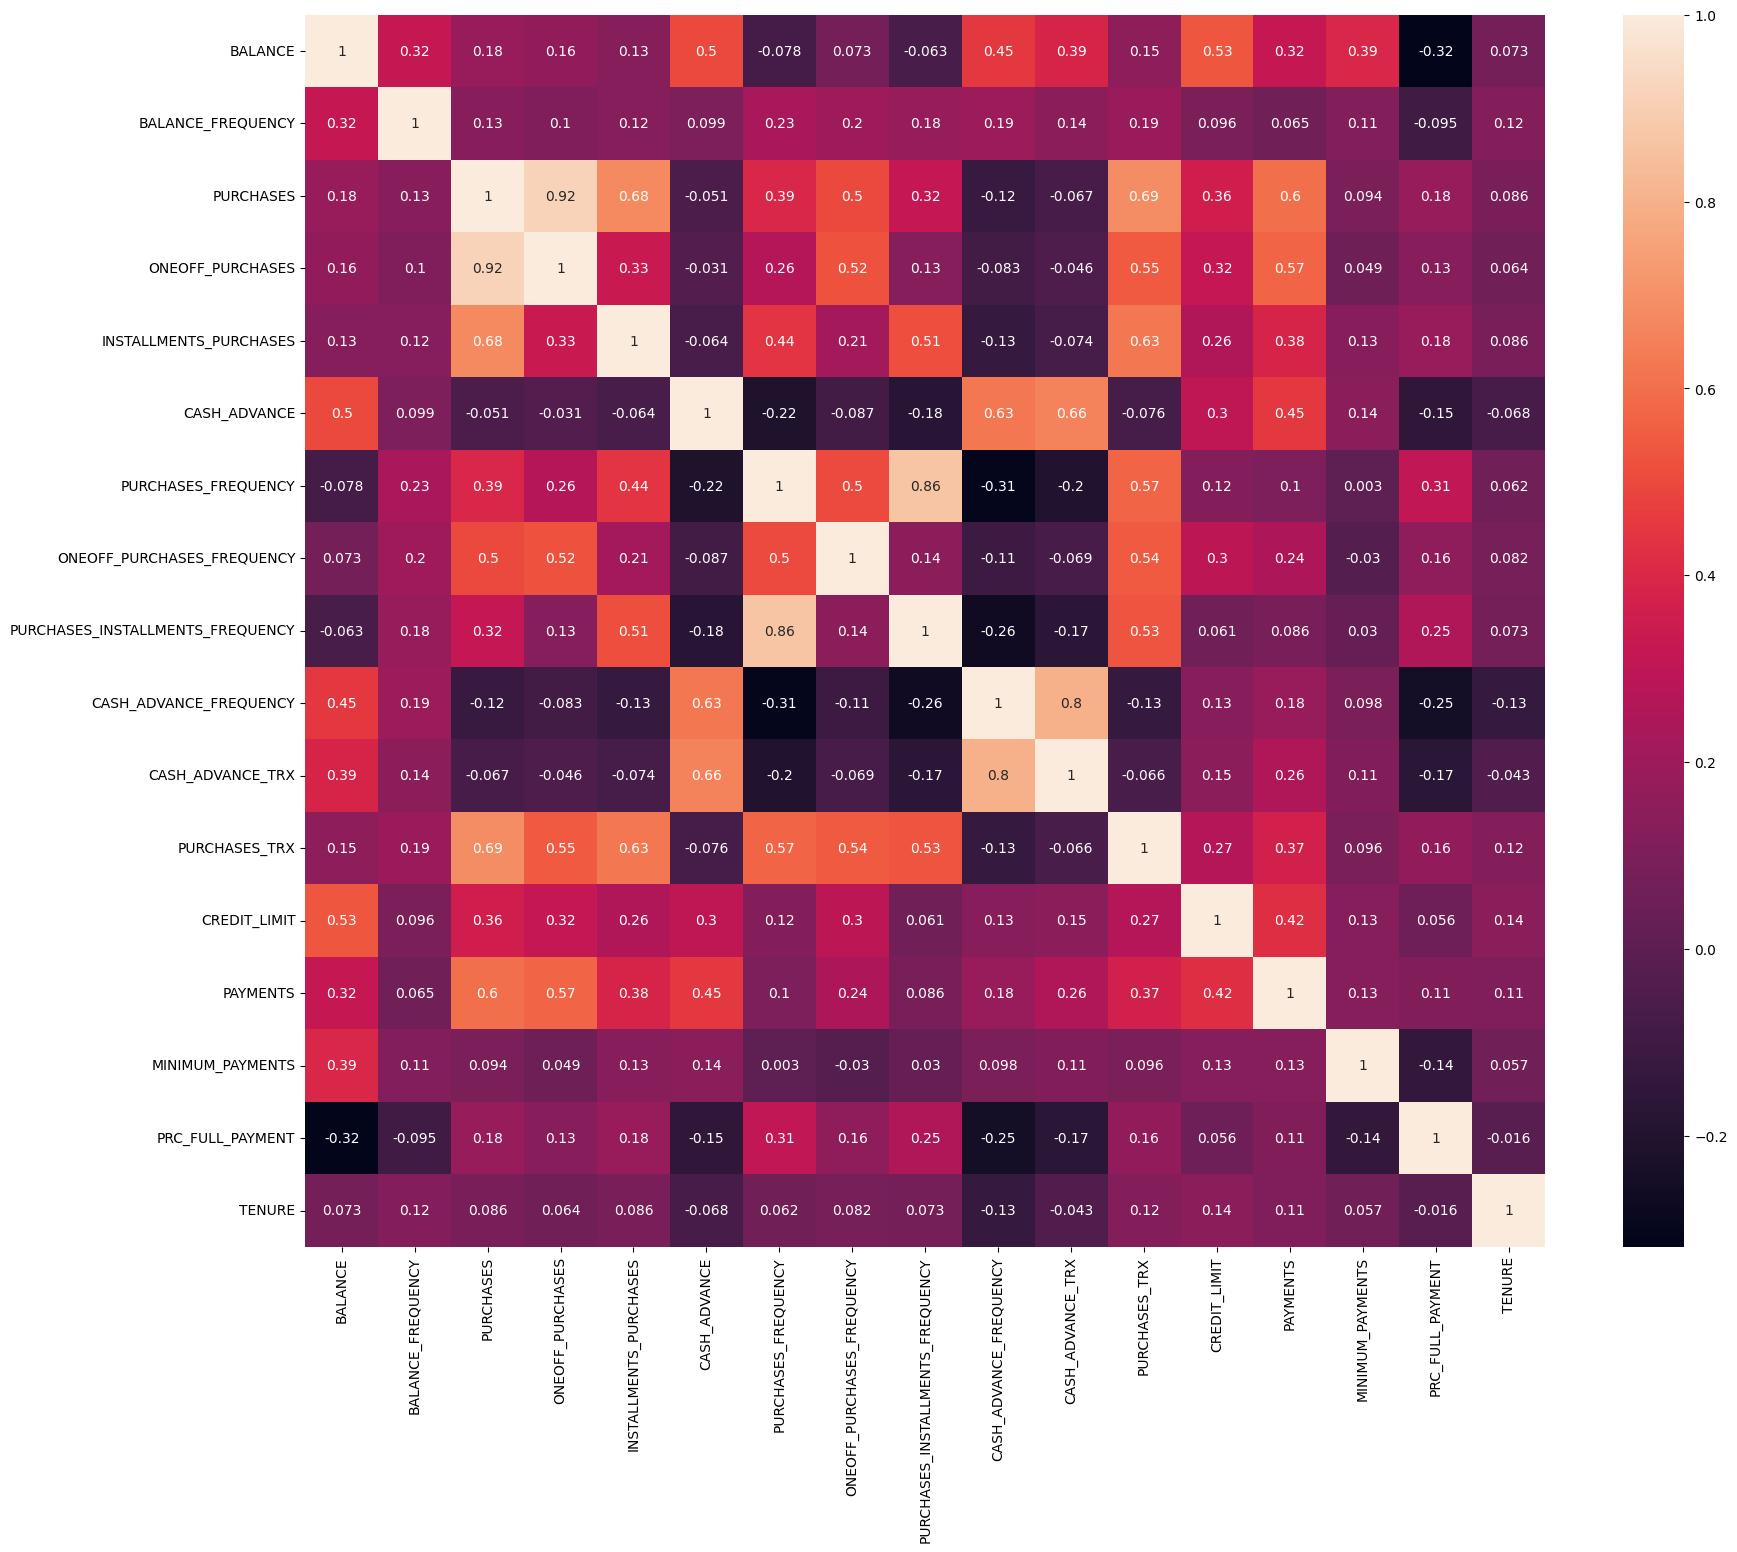

In [23]:
# visualize correlation using a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr,
            yticklabels=True,
            cbar=True,
            annot=True)

# MAKE SURE TO ADD INSIGHTS + EXTERNAL ADDITIONS + EXPLANATIONS OF UNCLEAR CONCEPTS

# K-Means Clustering

## Elbow Method

In [24]:
#scale the data to have a mean of 0 and standard deviation of 1 (reduce sensitivity to scale of data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataframe)

In [25]:
df_scaled.shape
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [26]:
print(df_scaled.dtype)

float64


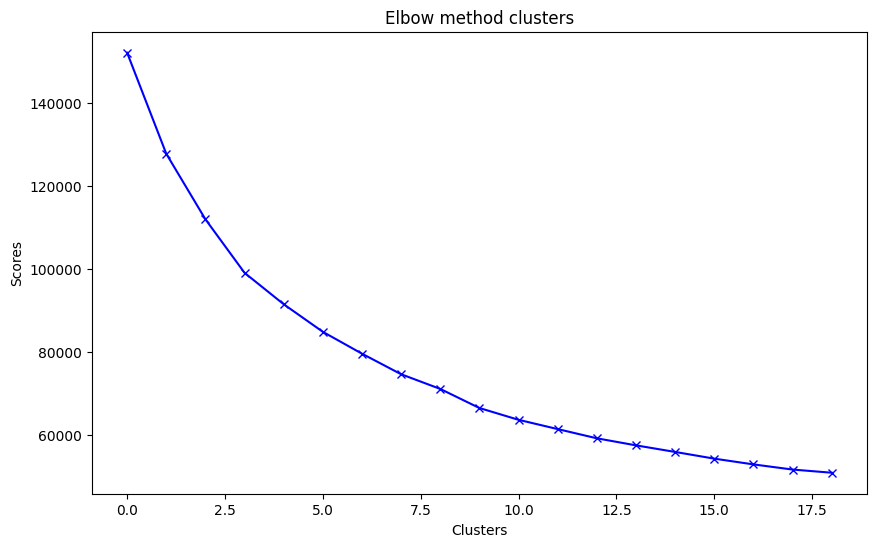

In [27]:
# trying different cluster numbers to determine the optimal number of clusters with the elbow method
# computes the inertia (sum of squared distances)
scores = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(scores, 'bx-')
plt.title('Elbow method clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# though it is not the clearest elbow, let's assume 8, where the values begin reducing more or less linearly

In [28]:
# use the KneeLocator to better identify the elbow programatically
kl = KneeLocator(range(1, 20), scores, curve="convex", direction="decreasing")
kl.elbow

6

## K-Means Application

In [29]:
# cluster the data into 6 clusters and save the labels
kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [30]:
kmeans.cluster_centers_.shape

(6, 17)

In [31]:
kmeans.cluster_centers_

array([[-6.97843901e-01, -2.12155348e+00, -3.13037681e-01,
        -2.31014591e-01, -3.15659218e-01, -3.06911523e-01,
        -5.60037445e-01, -4.18705191e-01, -4.65063787e-01,
        -4.84402776e-01, -3.57812761e-01, -4.25745811e-01,
        -2.09328907e-01, -2.21024545e-01, -2.56014904e-01,
         2.61571138e-01, -1.65980147e-01],
       [-3.96865073e-01,  3.08323092e-01, -6.73654075e-02,
        -2.44767474e-01,  2.90362631e-01, -3.65853710e-01,
         9.64681971e-01, -3.76323720e-01,  1.13922865e+00,
        -4.63438294e-01, -3.58105448e-01,  1.22143131e-01,
        -3.29832526e-01, -2.51488072e-01, -5.60376032e-02,
         3.40692186e-01, -2.51661956e-02],
       [-1.02811674e-02,  3.72120931e-01, -3.45349102e-01,
        -2.23850051e-01, -4.05220520e-01, -8.17143489e-02,
        -8.26548285e-01, -3.35680397e-01, -7.70854653e-01,
         1.31980995e-01, -2.82703176e-02, -4.70705048e-01,
        -3.32476537e-01, -2.62069573e-01, -2.98800138e-02,
        -4.51011688e-01, -8.6

In [32]:
kmeans.inertia_

84851.13240432608

In [33]:
# save cluster centers in a DataFrame
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[dataframe.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.697844,-2.121553,-0.313038,-0.231015,-0.315659,-0.306912,-0.560037,-0.418705,-0.465064,-0.484403,-0.357813,-0.425746,-0.209329,-0.221025,-0.256015,0.261571,-0.165980
1,-0.396865,0.308323,-0.067365,-0.244767,0.290363,-0.365854,0.964682,-0.376324,1.139229,-0.463438,-0.358105,0.122143,-0.329833,-0.251488,-0.056038,0.340692,-0.025166
2,-0.010281,0.372121,-0.345349,-0.223850,-0.405221,-0.081714,-0.826548,-0.335680,-0.770855,0.131981,-0.028270,-0.470705,-0.332477,-0.262070,-0.029880,-0.451012,-0.008641
3,0.137676,0.427207,0.926437,0.877387,0.578596,-0.309096,1.087856,1.838892,0.542908,-0.405671,-0.318458,1.184038,0.692399,0.380207,-0.024143,0.435885,0.271440
4,1.591479,0.376997,-0.204185,-0.148783,-0.209546,1.949748,-0.449498,-0.183691,-0.406362,1.901136,1.855405,-0.244017,0.963871,0.776815,0.512337,-0.391139,-0.089840
5,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341


In [34]:
cluster_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   (BALANCE,)                           6 non-null      float64
 1   (BALANCE_FREQUENCY,)                 6 non-null      float64
 2   (PURCHASES,)                         6 non-null      float64
 3   (ONEOFF_PURCHASES,)                  6 non-null      float64
 4   (INSTALLMENTS_PURCHASES,)            6 non-null      float64
 5   (CASH_ADVANCE,)                      6 non-null      float64
 6   (PURCHASES_FREQUENCY,)               6 non-null      float64
 7   (ONEOFF_PURCHASES_FREQUENCY,)        6 non-null      float64
 8   (PURCHASES_INSTALLMENTS_FREQUENCY,)  6 non-null      float64
 9   (CASH_ADVANCE_FREQUENCY,)            6 non-null      float64
 10  (CASH_ADVANCE_TRX,)                  6 non-null      float64
 11  (PURCHASES_TRX,)                    

In [35]:
# inverse transformation to transform cluster centers back to the original scale of the data
# here we can take a look at the characterisitcs of each cluster
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [dataframe.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,111.971653,0.374694,334.395004,209.000465,125.620931,335.263311,0.265580,0.077550,0.179609,0.038210,0.807018,4.127384,3732.825243,1093.299450,267.574608,0.230220,11.295195
1,738.433679,0.950310,859.277602,186.173496,673.638969,211.658792,0.877524,0.090193,0.817196,0.042405,0.805020,17.745854,3294.383775,1005.110526,733.613272,0.253361,11.483640
2,1543.075446,0.965423,265.361154,220.892134,44.631756,807.512306,0.158617,0.102318,0.058080,0.161555,3.055903,3.009865,3284.763784,974.478117,794.572431,0.021801,11.505755
3,1851.036530,0.978472,2982.551670,2048.720612,934.284573,330.682005,0.926960,0.751035,0.580203,0.053965,1.075586,44.140590,7013.678967,2833.805467,807.943042,0.281204,11.880574
4,4877.004640,0.966578,566.960000,345.487536,221.578150,5067.584105,0.309945,0.147659,0.202939,0.515581,15.910603,8.644491,8001.408051,3981.946723,2058.187456,0.039313,11.397089
5,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415


In [36]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([2, 4, 3, ..., 1, 2, 2], dtype=int32)

In [37]:
# add cluster labels to the original DataFrame
df_cluster = pd.concat([dataframe, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


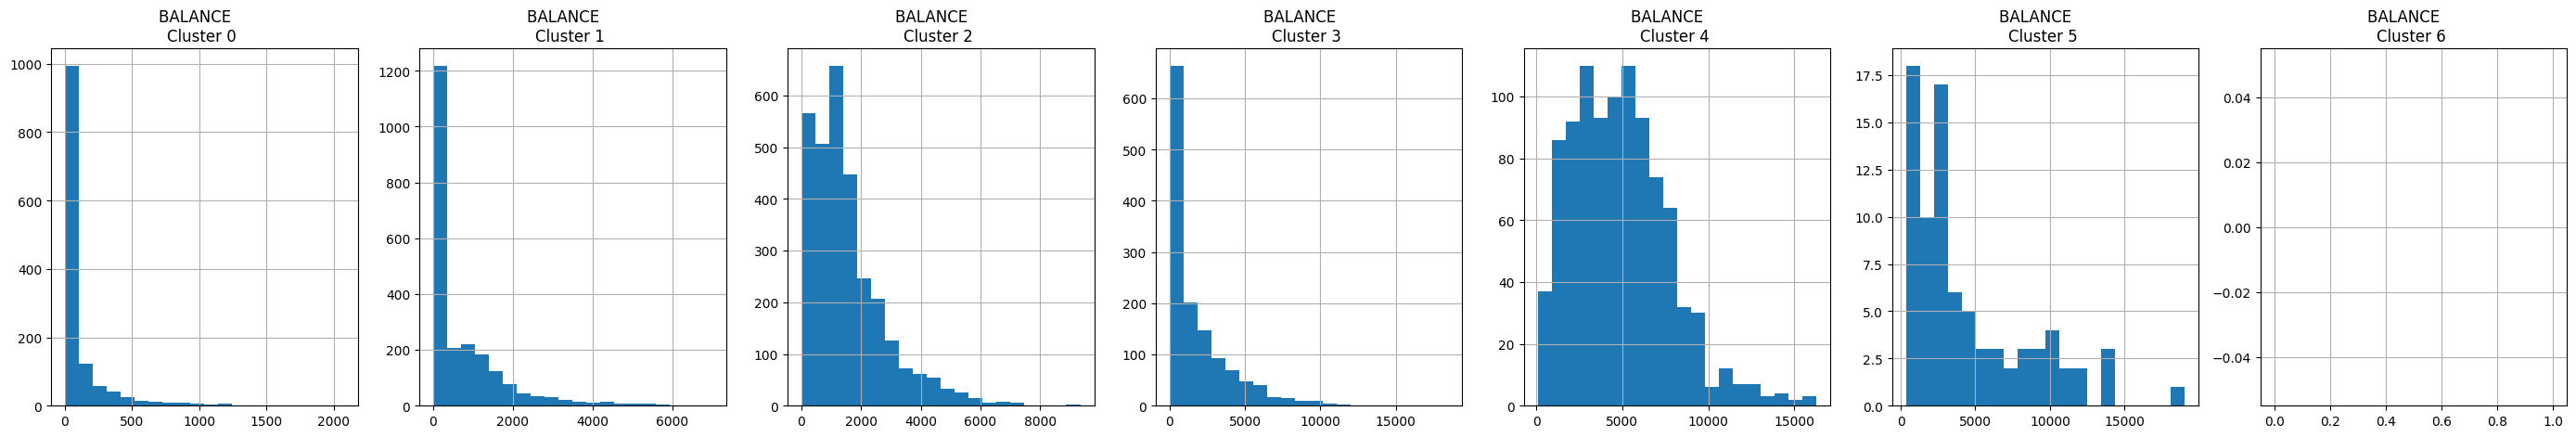

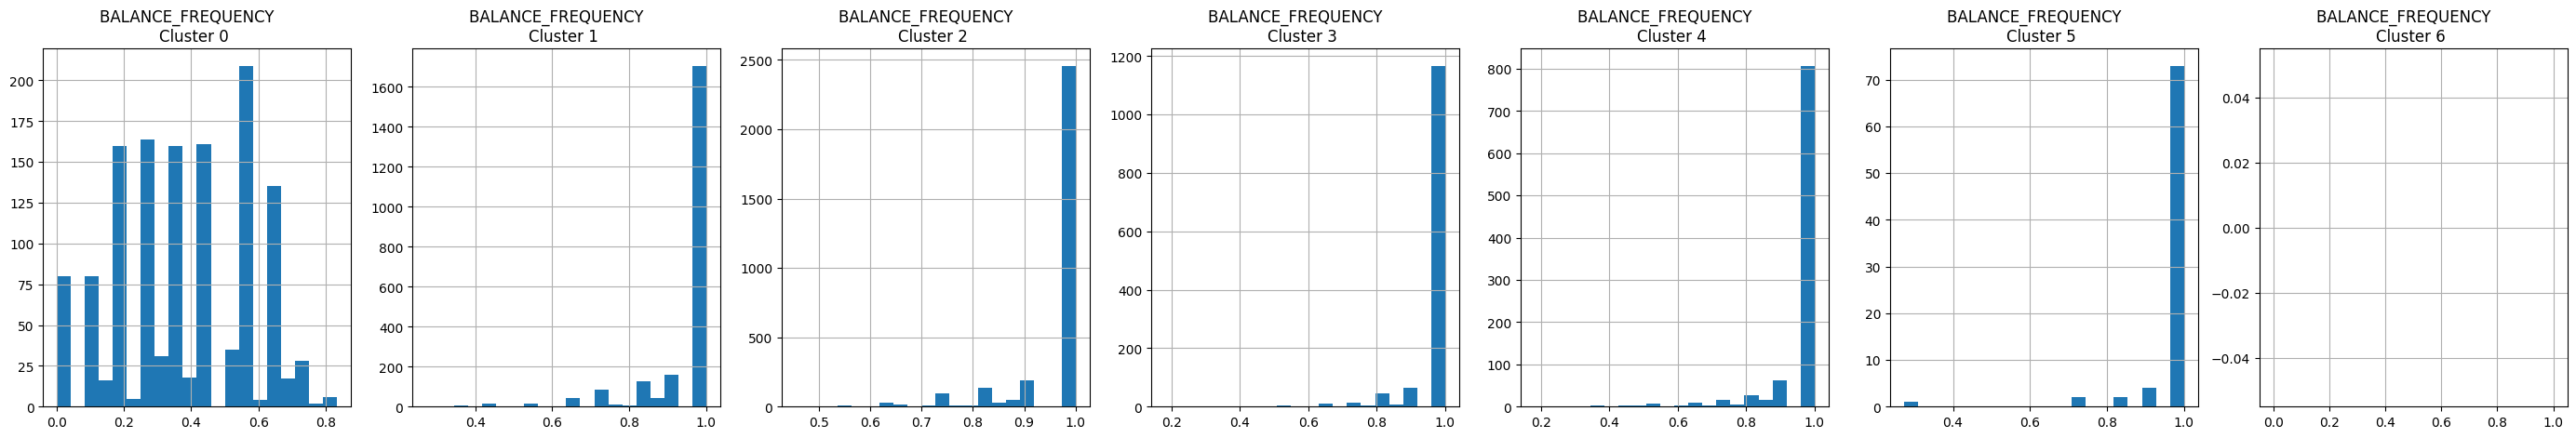

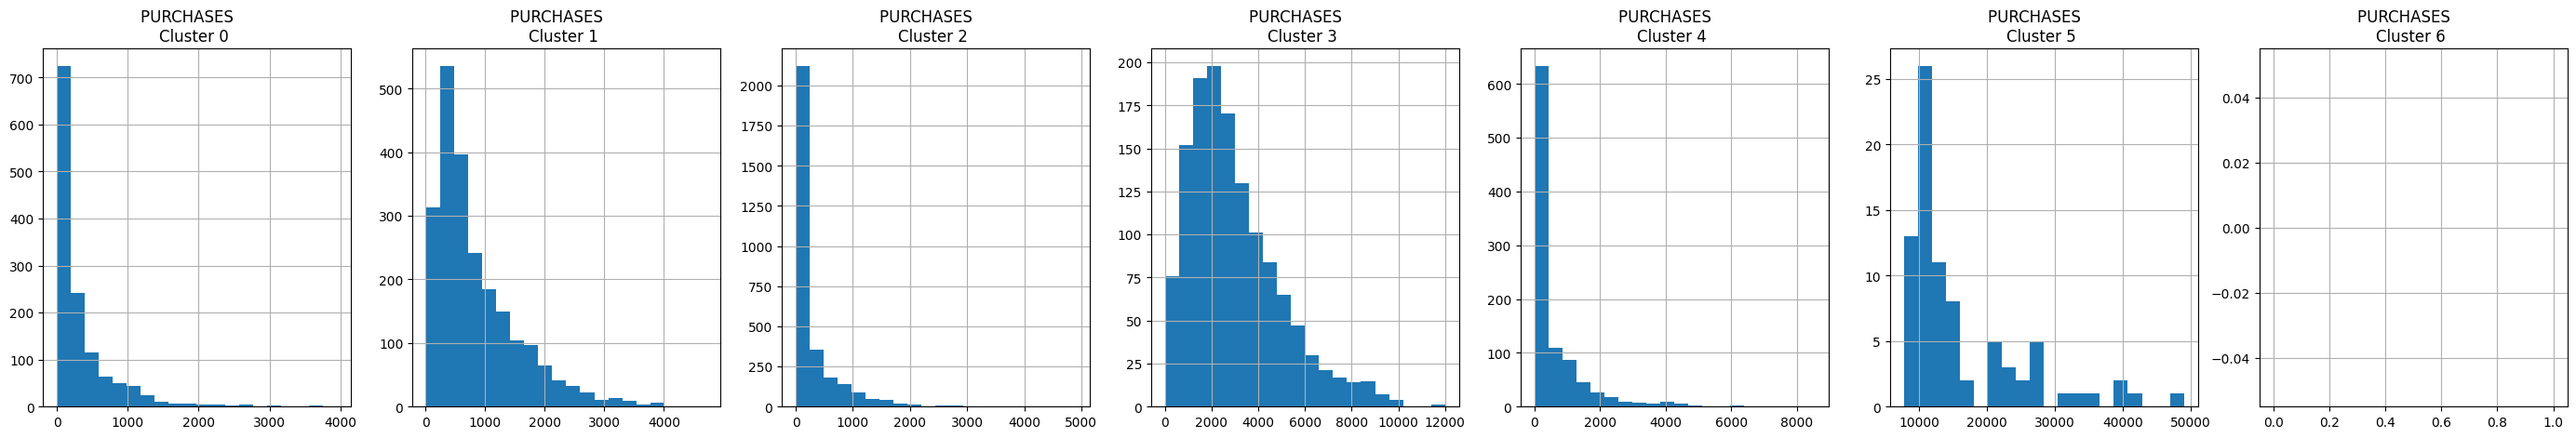

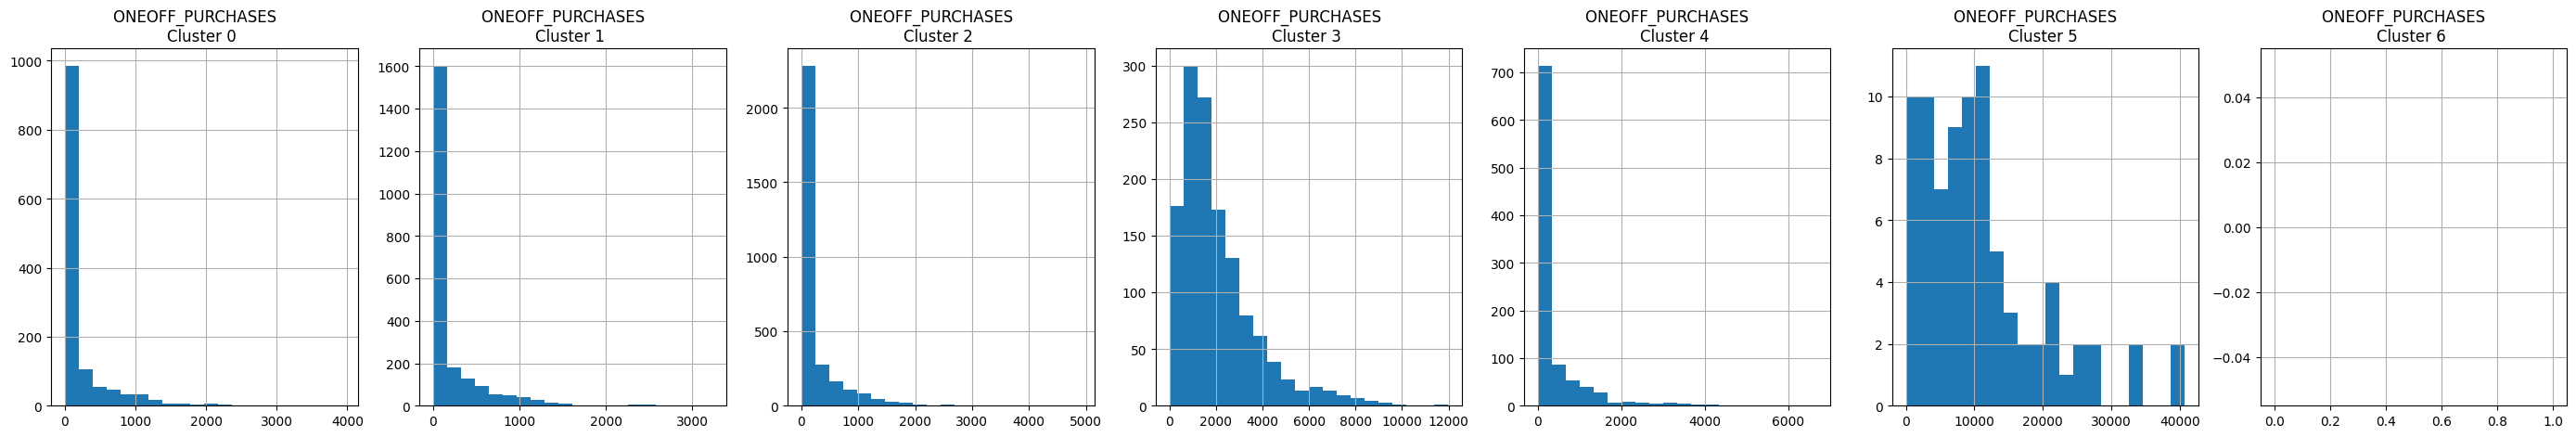

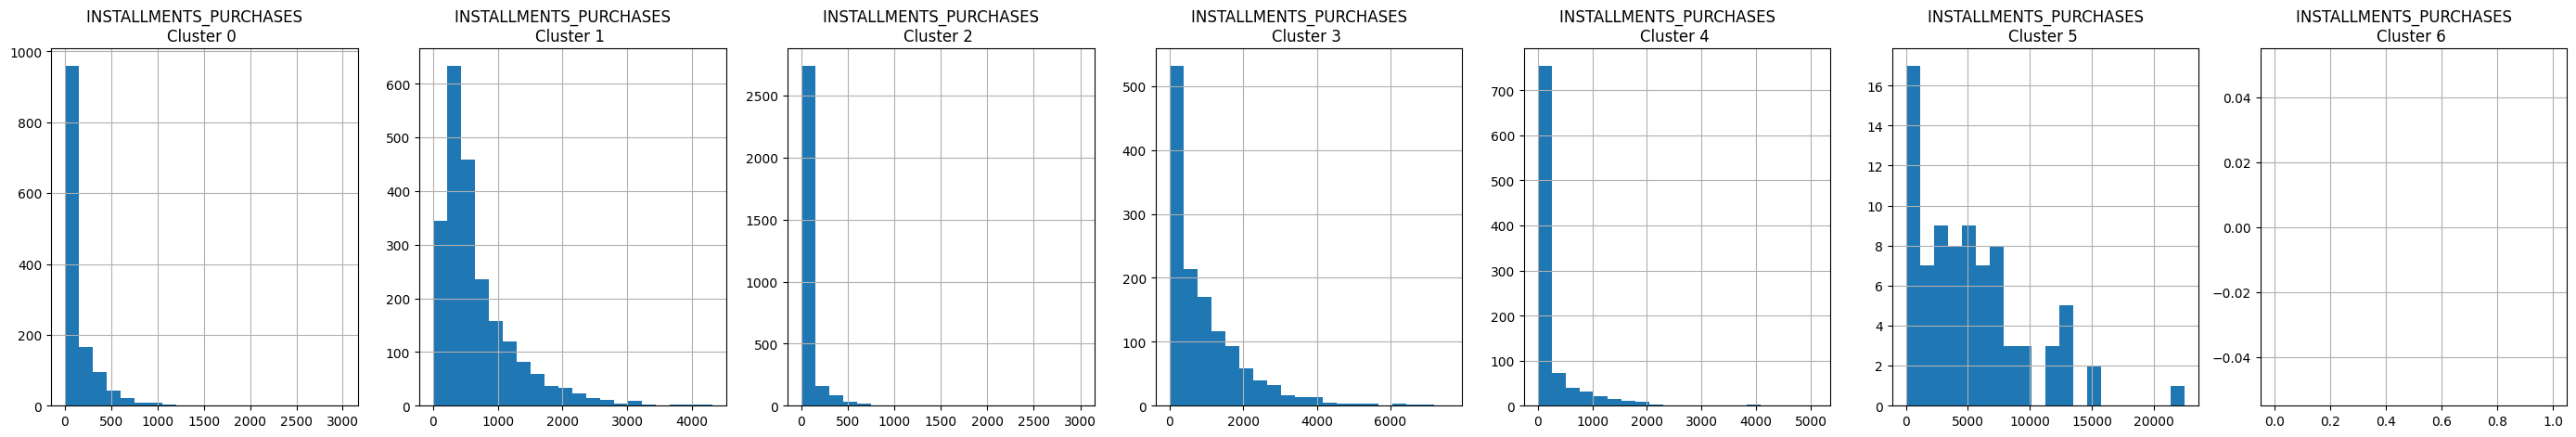

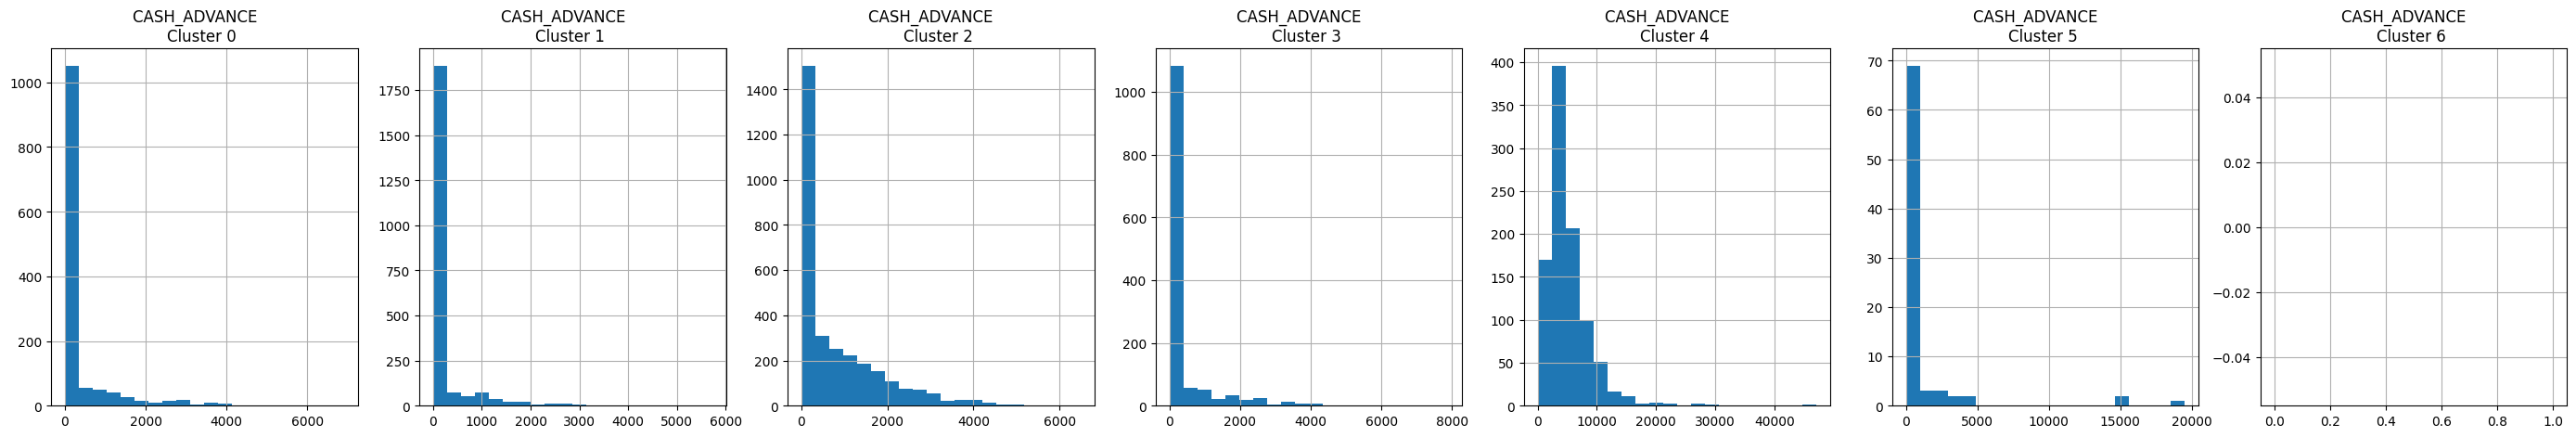

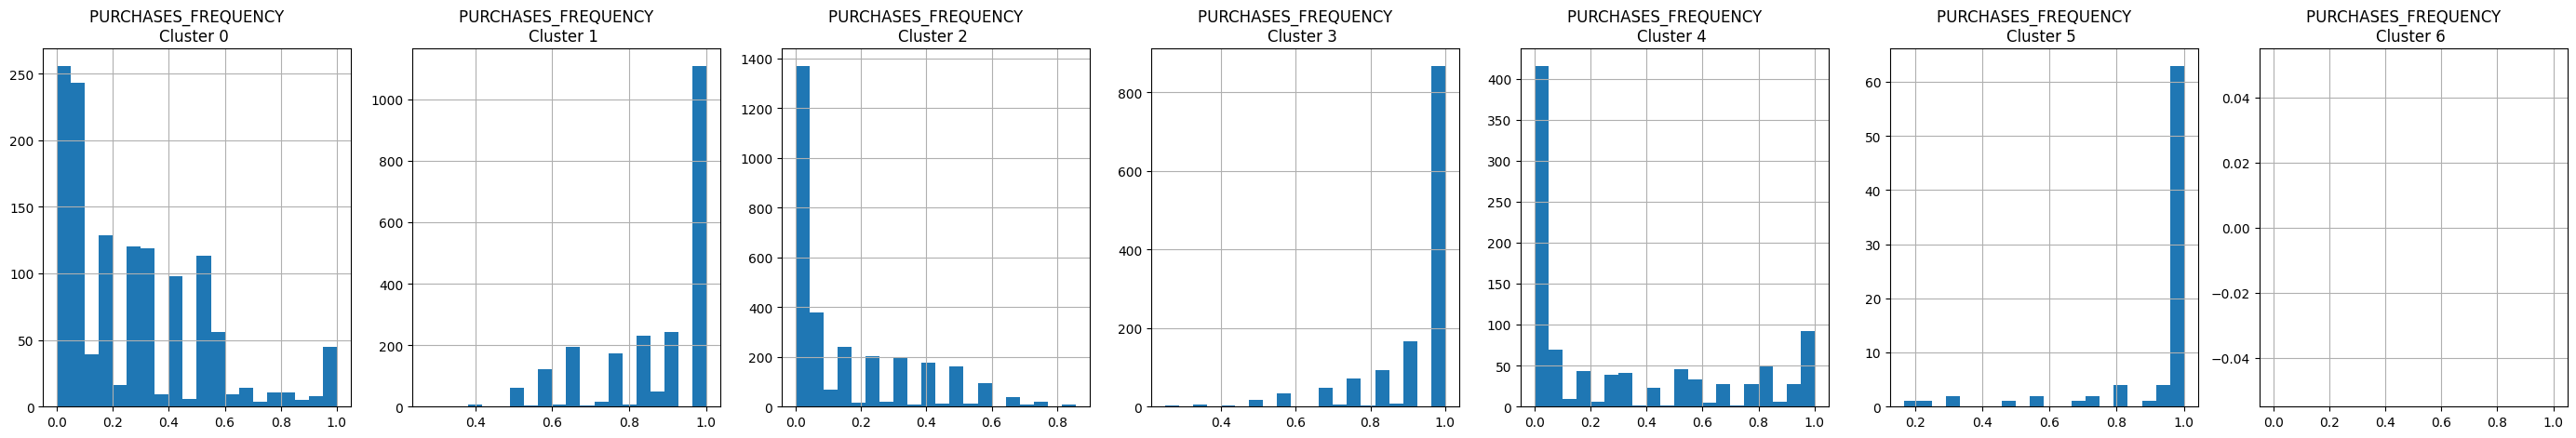

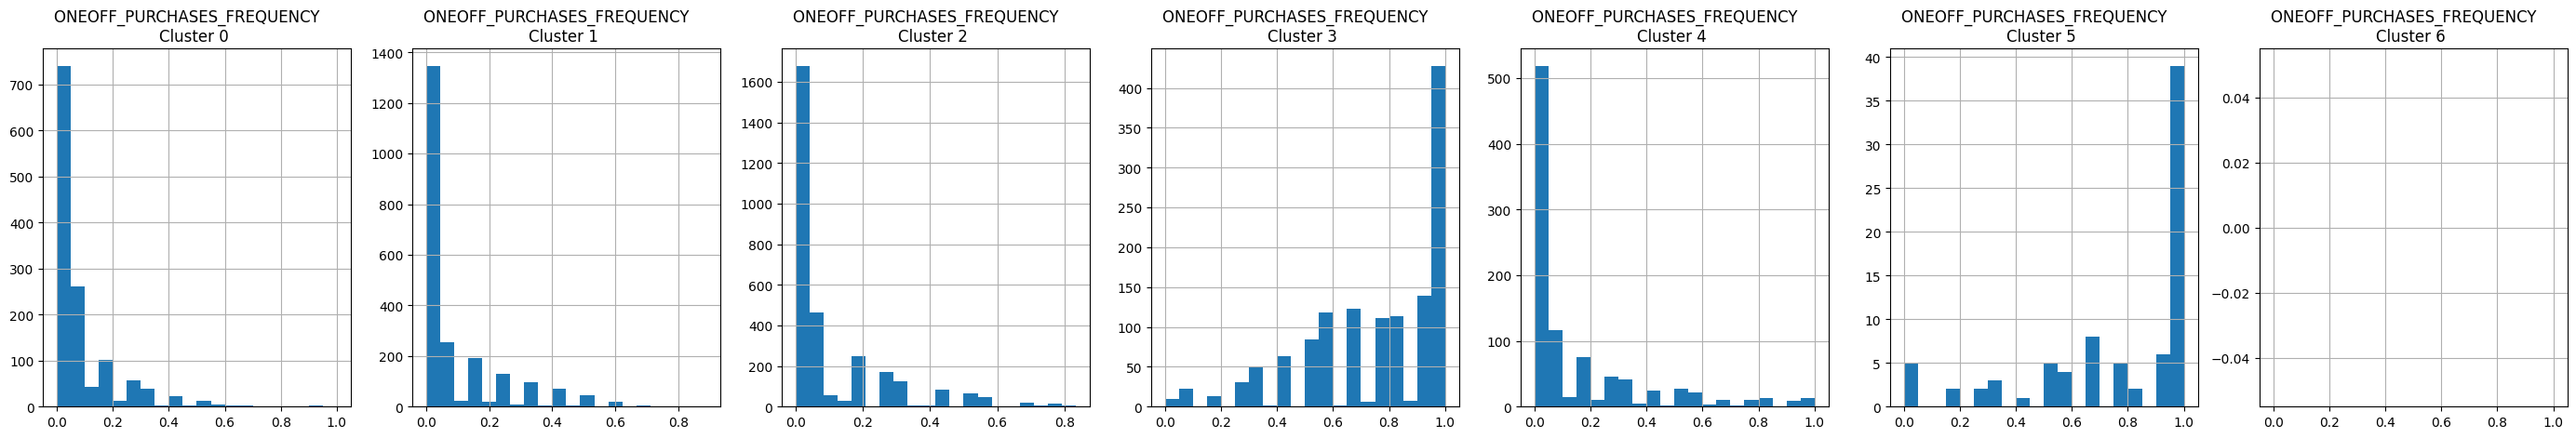

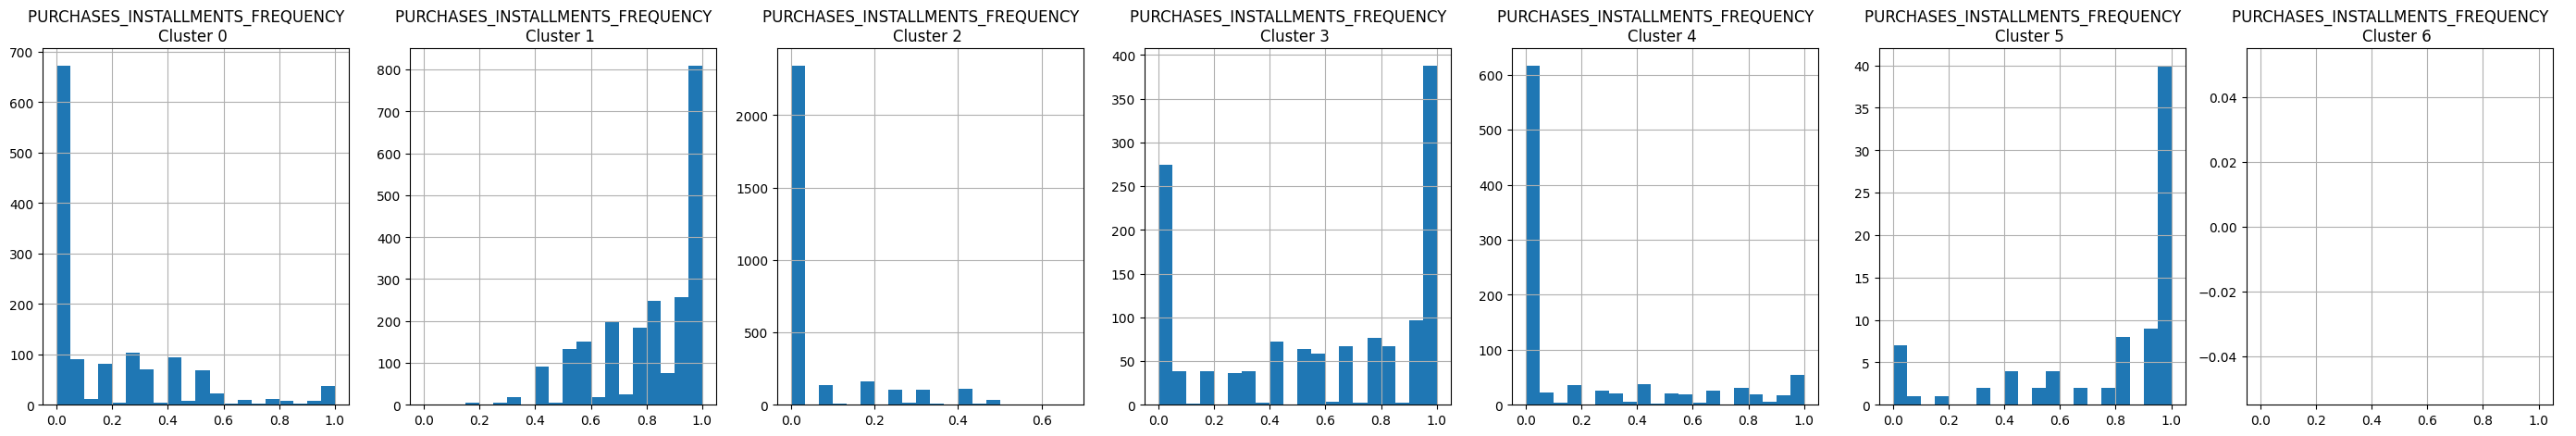

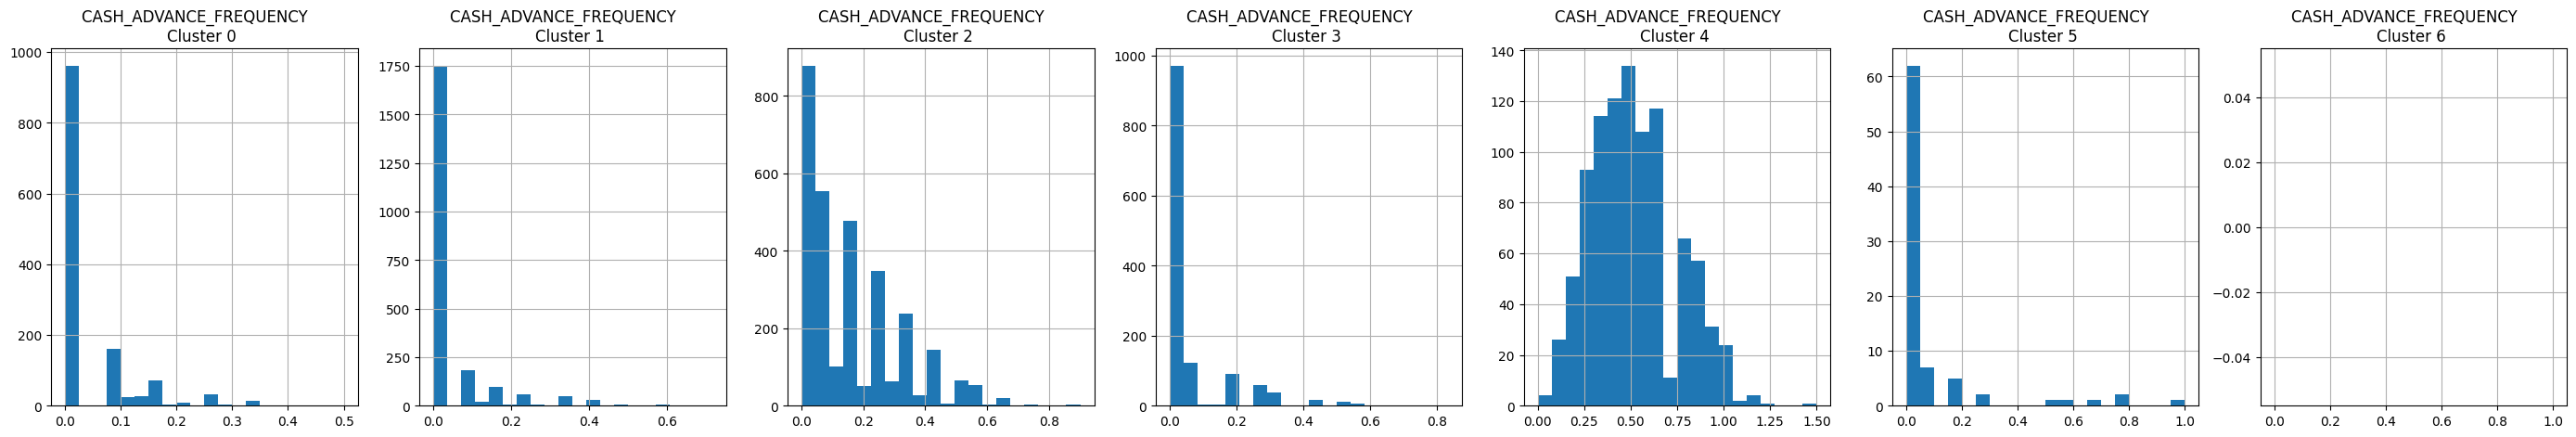

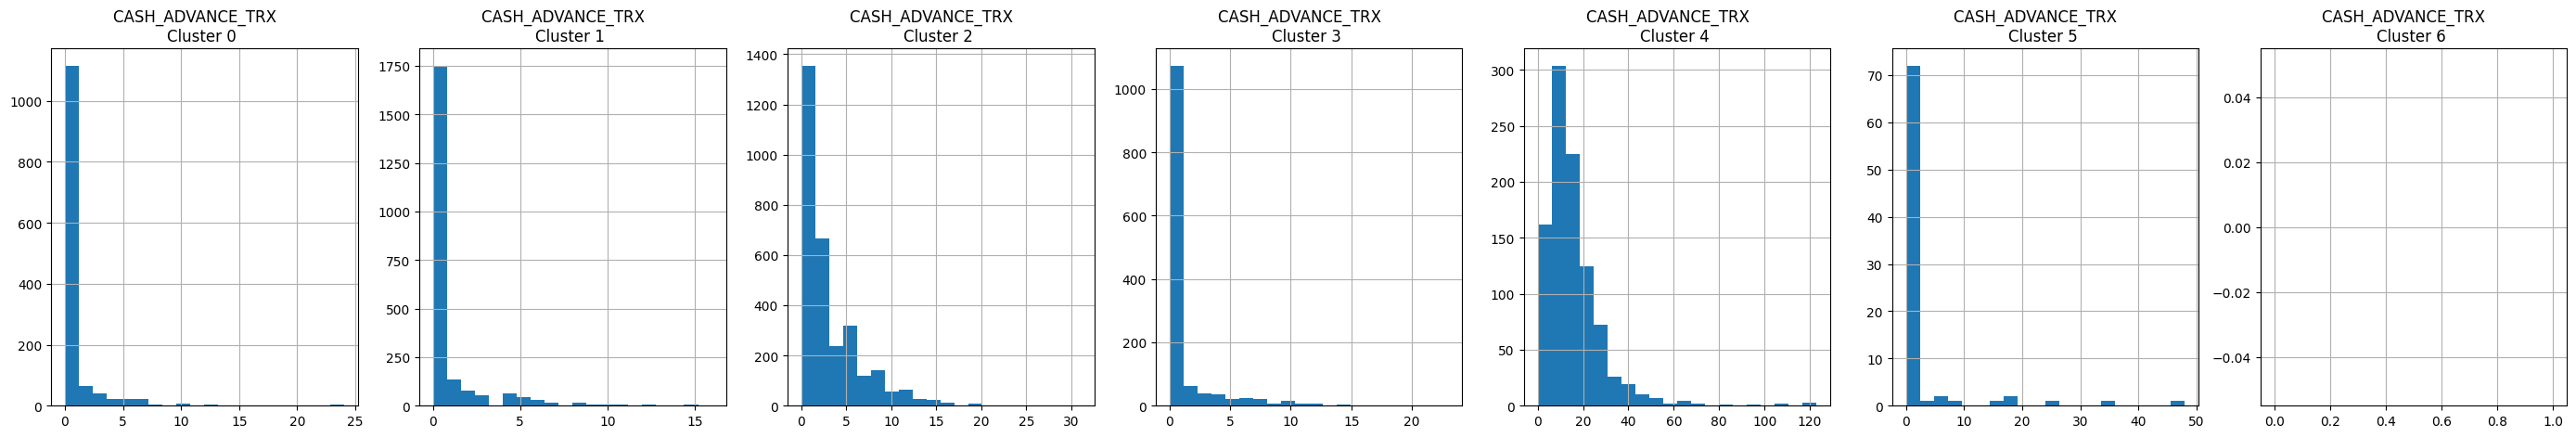

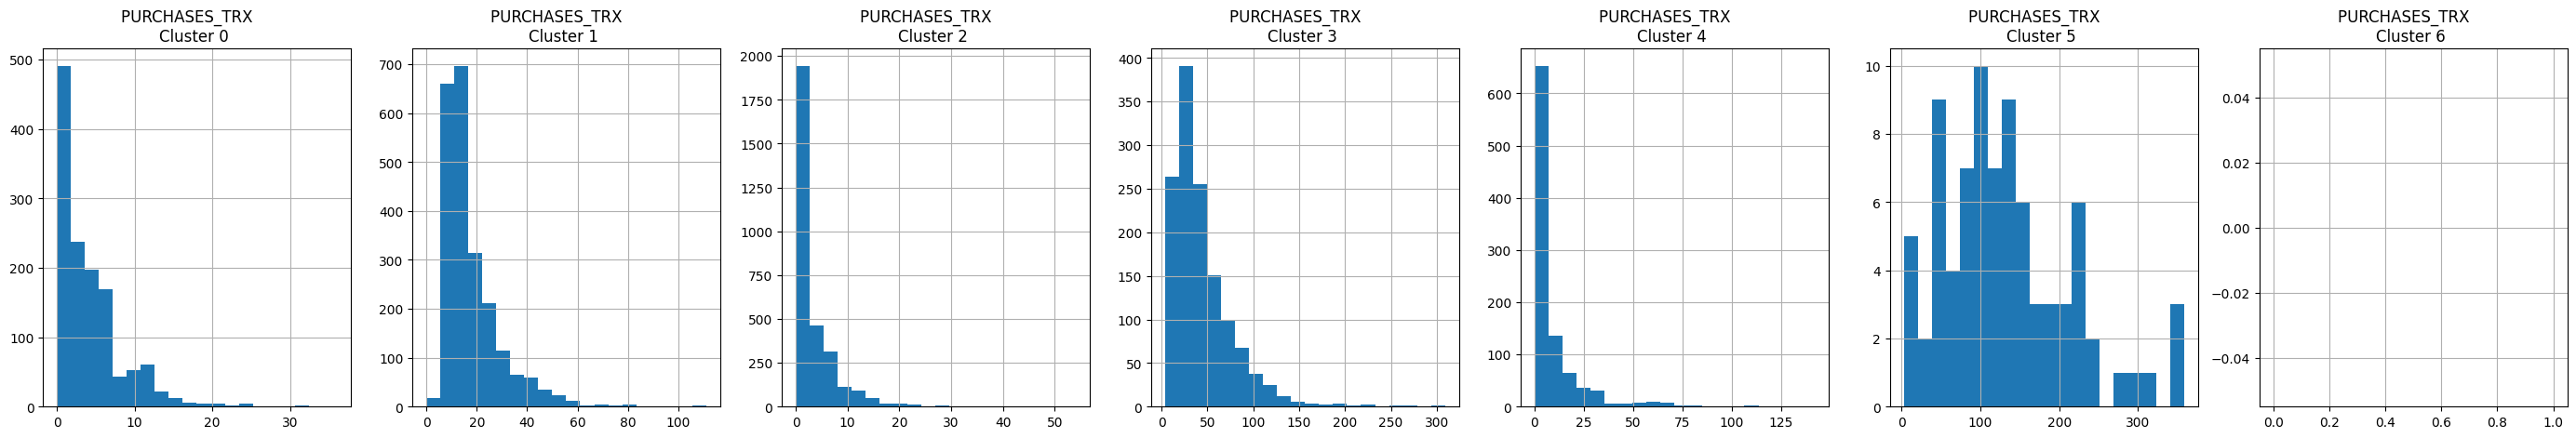

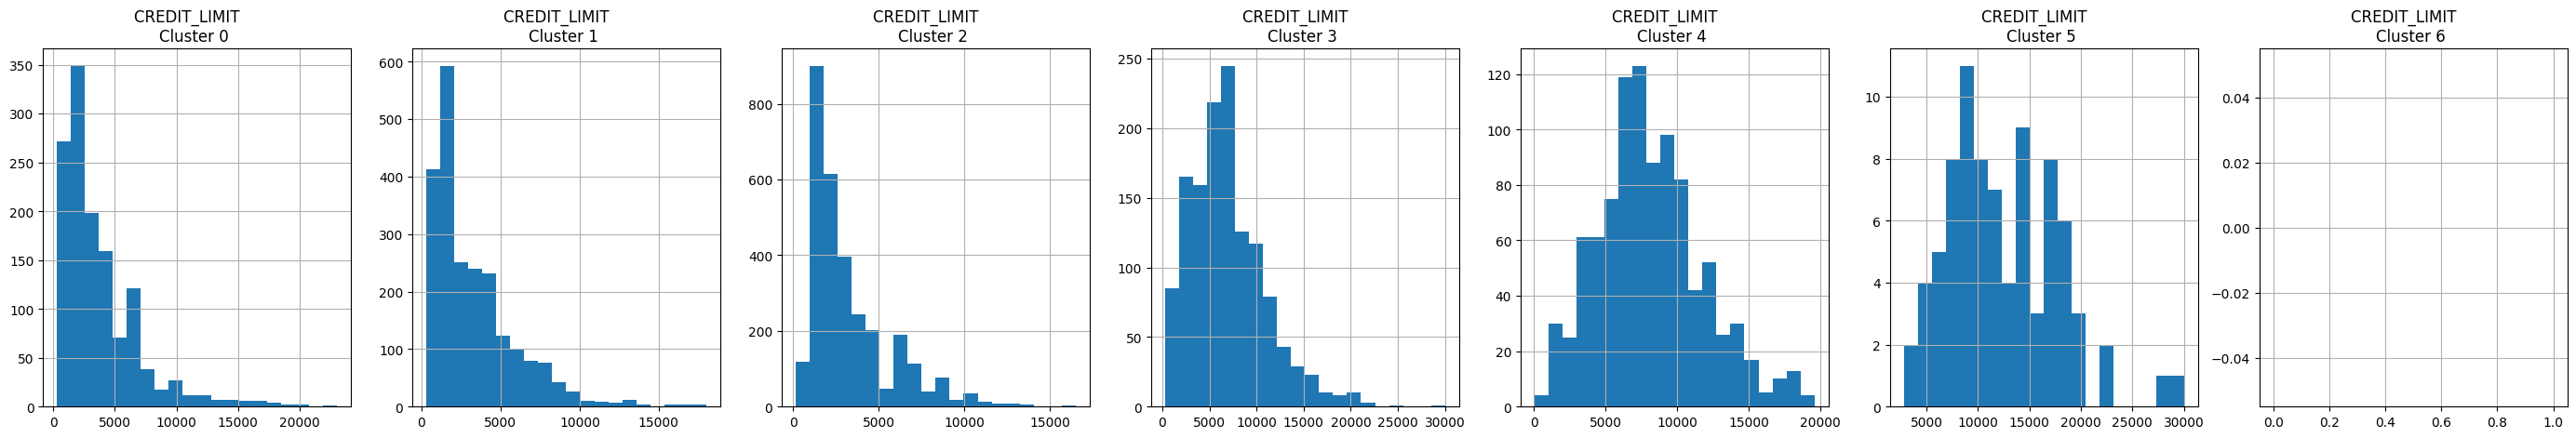

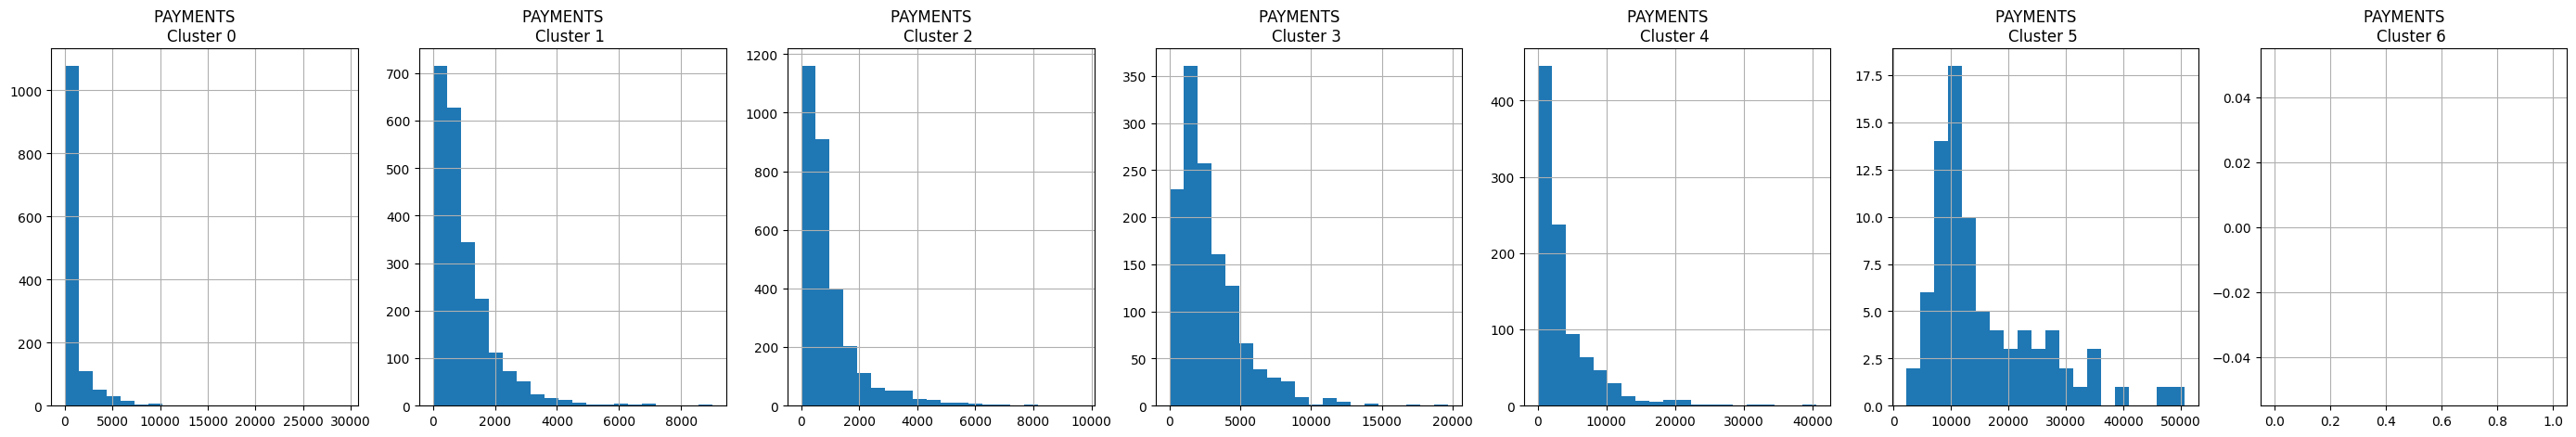

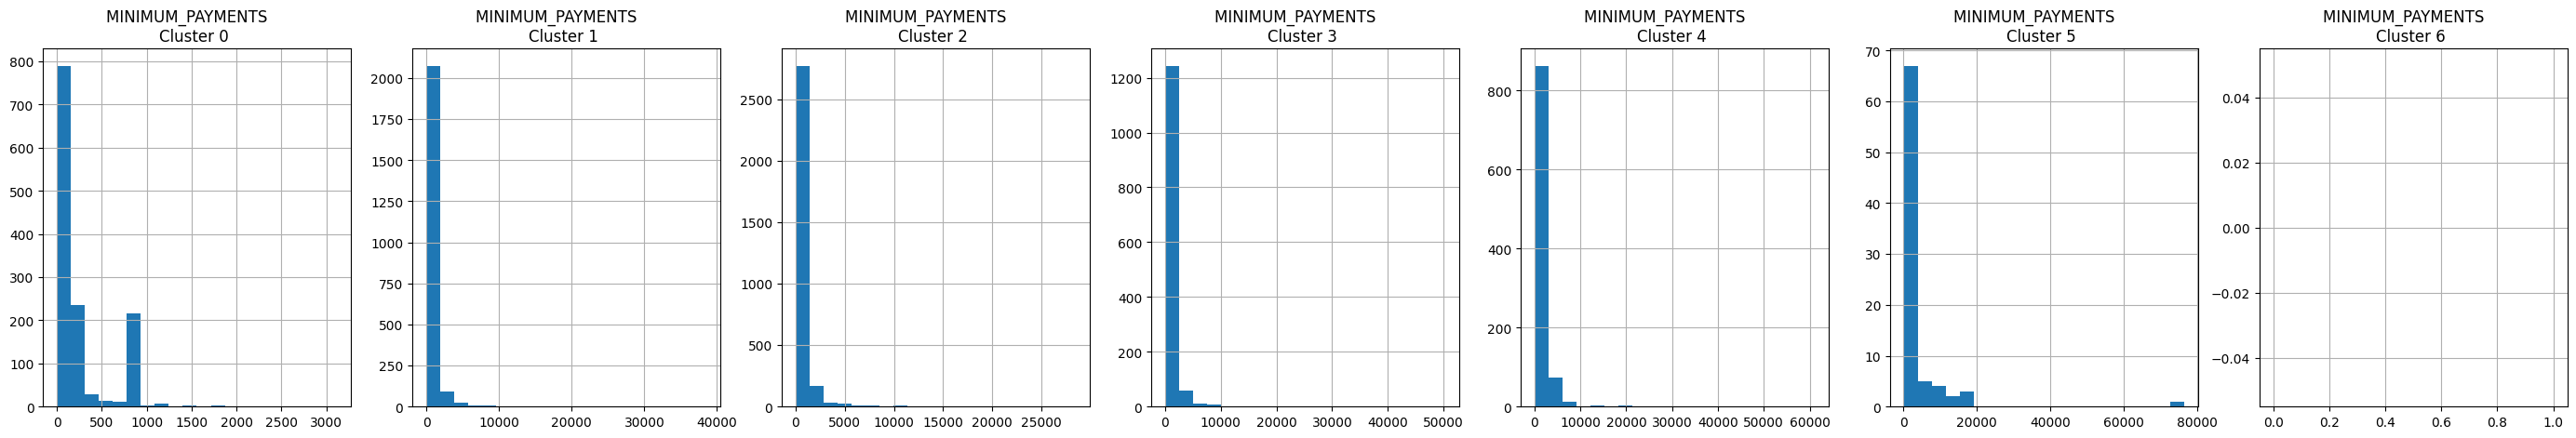

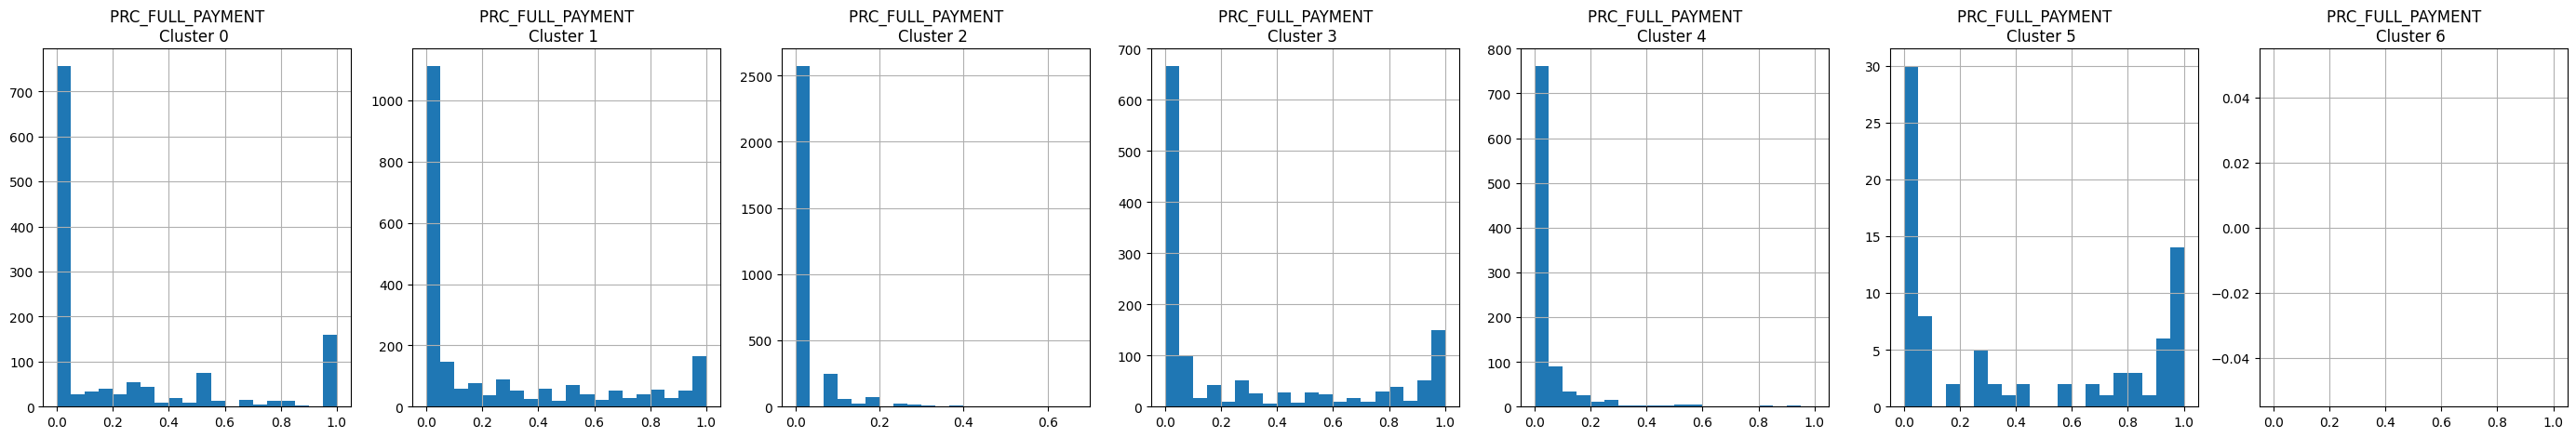

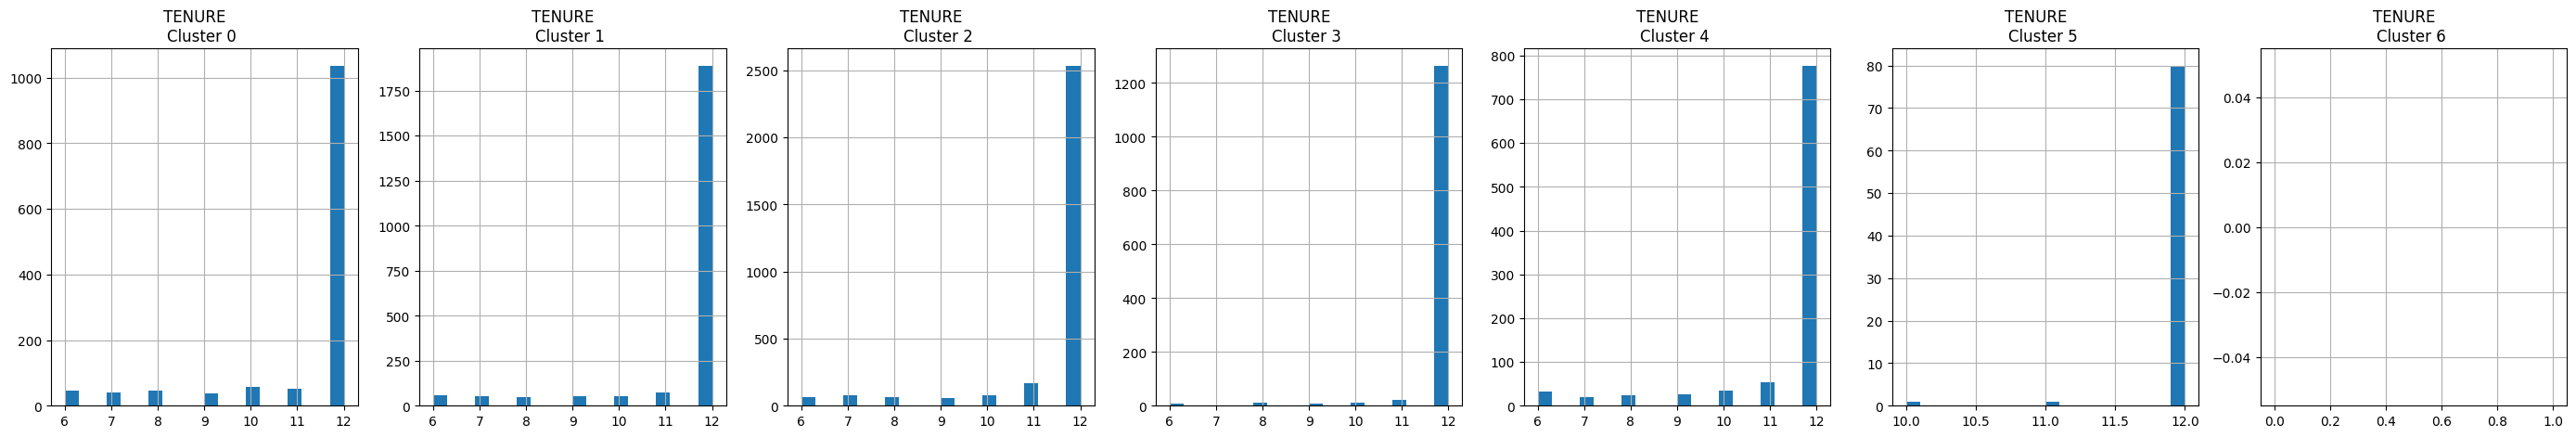

In [38]:
#plot the histogram for each feature within each cluster
for i in dataframe.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

# Principal Component Analysis + Visualization

In [39]:
# reduce the data to 2 dimensions for visualization + obtain principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222005, -1.07645033],
       [-1.1382977 ,  2.50653044],
       [ 0.9696826 , -0.38351817],
       ...,
       [-0.92620191, -1.81081159],
       [-2.33654903, -0.65800041],
       [-0.55642211, -0.400475  ]])

In [40]:
# create a DataFrame with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138298,2.506530
2,0.969683,-0.383518
3,-0.873629,0.043191
4,-1.599433,-0.688593


In [41]:
# add the cluster labels to the DataFrame
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,2
1,-1.138298,2.506530,4
2,0.969683,-0.383518,3
3,-0.873629,0.043191,2
4,-1.599433,-0.688593,2


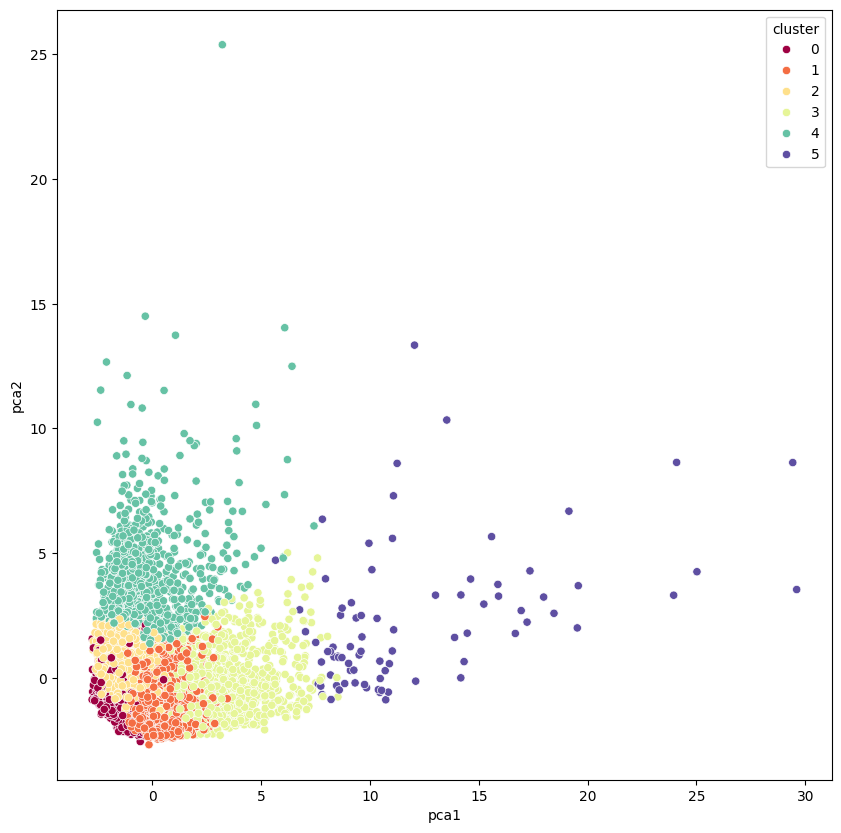

In [42]:
# scatter plot to visualize clusters in a 2D space
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette='Spectral')
plt.show()